#**Mohammod Abdullah Bin Hossain**

# **Overview of this Task**

**The project is centered on predicting the price of an Airbnb listing by leveraging various features in the dataset. It begins with an in-depth Exploratory Data Analysis (EDA), where the structure and distribution of the data are thoroughly examined. This includes identifying missing values, visualizing the distribution of numerical features such as ratings, reviews, and price, and analyzing the relationships between features through correlation matrices. A detailed investigation is carried out on categorical variables like host names and countries, exploring their impact on the target variable, price. The data cleaning phase follows, focusing on handling missing values and outliers. Missing values in key features, such as host names and check-in/check-out times, are carefully imputed, and outliers in the price and other numerical features are managed using the Interquartile Range (IQR) method to avoid distorting the model’s predictions.
For feature engineering, new insightful variables like price per guest and price per bedroom are created to offer deeper insights into pricing patterns. The price feature itself undergoes a log transformation to reduce skewness and stabilize variance, making the distribution more suitable for modeling. Moreover, to transform the continuous price variable into a classification problem, the price is discretized into 10 bins based on its log-transformed values. These bins are then labeled as categories, simplifying the task into a classification problem where the model predicts a price category rather than an exact value. This approach allows the model to focus on price ranges, which is beneficial given the diverse pricing strategies in the Airbnb listings.
Principal Component Analysis (PCA) is applied for dimensionality reduction, capturing 98% of the variance, thus reducing the complexity of the dataset while retaining crucial information. Features are scaled using Z-score standardization to ensure all variables contribute equally to the model. The development of the model follows, where two different Artificial Neural Network (ANN) architectures are tested and evaluated. Hyperparameter optimization, cross-validation, and performance metrics such as accuracy, precision, recall, F1-score, and ROC curves are used to assess the models' effectiveness.
To enhance predictive accuracy, an ensemble approach combining the strengths of ANN and Random Forest models is employed. The predictions from both models are stacked and passed to a meta-model, XGBoost, which refines the results, offering a more robust and accurate prediction. This ensemble method helps mitigate individual model weaknesses, ensuring better generalization and stability. The final submission includes a comprehensive workflow of the entire process, from data preparation to model evaluation, with clear explanations of each step taken to improve performance.**



In [ ]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#**Neccessary libraries**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from numpy.linalg import cond, svd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

# **Dataset loading**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Task assignment/airbnb.csv",low_memory=False)
df.head()

Unnamed: 0        id                                               name  \
0           0  49849504                                     Perla bungalov   
1           1  50891766  Authentic Beach Architect Sheltered Villa with...   
2           2  50699164                                  cottages sataplia   
3           3  49871422                        Sapanca Breathable Bungalow   
4           4  51245886                                      Bungalov Ev 2   

  rating reviews    host_name      host_id                   address  \
0   4.71      64    Mehmetcan  357334205.0  Kartepe, Kocaeli, Turkey   
1    New       0        Fatih  386223873.0      Kaş, Antalya, Turkey   
2   4.85      68       Giorgi  409690853.0          Imereti, Georgia   
3    5.0      13        Melih  401873242.0  Sapanca, Sakarya, Turkey   
4    New       0  Arp Sapanca  414884116.0  Sapanca, Sakarya, Turkey   

                                 features  \
0    2 guests,2 bedrooms,1 bed,1 bathroom   
1  4 guests,2 bedrooms,2 beds,2 bathrooms   
2    4 guests,1 bedroom,3 beds,1 bathroom   
3    4 guests,1 bedroom,2 beds,1 bathroom   
4     2 guests,1 bedroom,1 bed,1 bathroom   

                                           amenities  \
0  Mountain view,Valley view,Lake access,Kitchen,...   
1  Kitchen,Wifi,Dedicated workspace,Free parking ...   
2  Mountain view,Kitchen,Wifi,Dedicated workspace...   
3  Mountain view,Valley view,Kitchen,Wifi,Free pa...   
4  Kitchen,Wifi,Free parking on premises,TV,Air c...   

                                        safety_rules  \
0  󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...   
1  󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...   
2  󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...   
3  󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...   
4  󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...   

                                        hourse_rules  \
0  Check-in: Flexible,Check out: 12:00 pm,Pets ar...   
1  Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...   
2  Check-in: After 1:00 pm,Check out: 12:00 pm,Se...   
3  Check-in: After 2:00 pm,Check out: 12:00 pm,No...   
4  Check-in: After 2:00 pm,Check out: 12:00 pm,No...   

                                           img_links  price   country  \
0  https://a0.muscache.com/im/pictures/a5da5cb7-c...   8078    Turkey   
1  https://a0.muscache.com/im/pictures/61b70855-2...   4665    Turkey   
2  https://a0.muscache.com/im/pictures/miso/Hosti...   5991   Georgia   
3  https://a0.muscache.com/im/pictures/72e6396e-e...  11339    Turkey   
4  https://a0.muscache.com/im/pictures/73973308-e...   6673    Turkey   

   bathrooms  beds  guests  toiles  bedrooms  studios              checkin  \
0          1     1       2       0         2        0             Flexible   
1          2     2       4       0         2        0   4 00 pm - 11 00 pm   
2          1     3       4       0         1        0        After 1 00 pm   
3          1     2       4       0         1        0        After 2 00 pm   
4          1     1       2       0         1        0        After 2 00 pm   

    checkout  
0   12 00 pm  
1   10 00 am  
2   12 00 pm  
3   12 00 pm  
4   12 00 pm

## Dataset Description

In [ ]:
# Check the column names in the train dataset
print(df.columns)

print(df.info())

Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  1

In [ ]:
print("Columns of dataset:",df.columns)
print("Shape of dataset",df.shape)
print("information about dataset",df.info)
print("Distribustion of dataset",df.describe())

Columns of dataset: Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')
Shape of dataset (12805, 23)
information about dataset <bound method DataFrame.info of        Unnamed: 0        id  \
0               0  49849504   
1               1  50891766   
2               2  50699164   
3               3  49871422   
4               4  51245886   
...           ...       ...   
12800       12800  44697740   
12801       12801  29975283   
12802       12802  32977697   
12803       12803   8006146   
12804       12804  40547903   

                                                    name rating reviews  \
0                                         Perla bungalov   4.71      64   
1      Authentic Beach Architect Sheltered Villa with...  

## Dataset Distribution

In [ ]:
df.describe()

Unnamed: 0            id       host_id         price     bathrooms  \
count  12805.000000  1.280500e+04  1.280500e+04  1.280500e+04  12805.000000   
mean    6402.000000  7.525187e+16  1.638192e+08  1.769780e+04      1.874424   
std     3696.629433  2.007933e+17  1.413622e+08  4.569364e+04      2.091399   
min        0.000000  1.313100e+04  2.303900e+04  3.930000e+02      0.000000   
25%     3201.000000  2.023958e+07  3.700032e+07  3.994000e+03      1.000000   
50%     6402.000000  3.682229e+07  1.256459e+08  8.175000e+03      1.000000   
75%     9603.000000  4.999760e+07  2.639623e+08  1.606200e+04      2.000000   
max    12804.000000  7.017905e+17  4.758973e+08  1.907963e+06     50.000000   

               beds        guests        toiles      bedrooms       studios  
count  12805.000000  12805.000000  12805.000000  12805.000000  12805.000000  
mean       3.316751      5.213745      0.019211      2.136041      0.023585  
std        4.037791      3.808830      0.137272      2.359005      0.151757  
min        0.000000      1.000000      0.000000      0.000000      0.000000  
25%        1.000000      2.000000      0.000000      1.000000      0.000000  
50%        2.000000      4.000000      0.000000      1.000000      0.000000  
75%        4.000000      6.000000      0.000000      3.000000      0.000000  
max       98.000000     16.000000      1.000000     50.000000      1.000000

# **Exploratory Data Analysis (EDA)**

<Axes: >

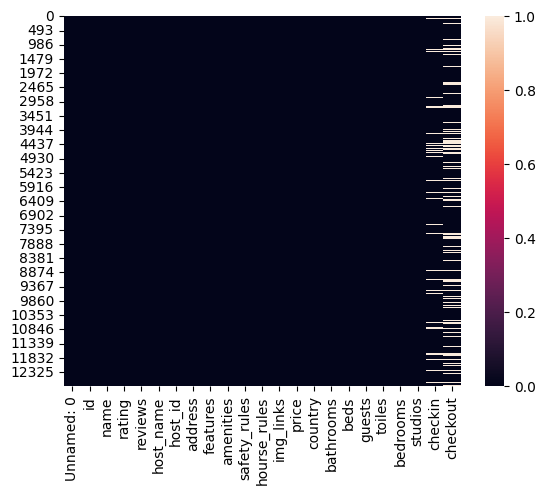

In [ ]:
sns.heatmap(df[df.columns].isna() )

## Checking for missing values

In [ ]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

## Replace '0' with 'New' in rating features

In [ ]:
df['rating'] = df['rating'].replace('New', 0)
print(df)

       Unnamed: 0        id  \
0               0  49849504   
1               1  50891766   
2               2  50699164   
3               3  49871422   
4               4  51245886   
...           ...       ...   
12800       12800  44697740   
12801       12801  29975283   
12802       12802  32977697   
12803       12803   8006146   
12804       12804  40547903   

                                                    name rating reviews  \
0                                         Perla bungalov   4.71      64   
1      Authentic Beach Architect Sheltered Villa with...      0       0   
2                                      cottages sataplia   4.85      68   
3                            Sapanca Breathable Bungalow    5.0      13   
4                                          Bungalov Ev 2      0       0   
...                                                  ...    ...     ...   
12800            Brown Dome House No. 3, full of healing   4.94      16   
12801       Bubble Hotel Ub

## Histogram for price distribution

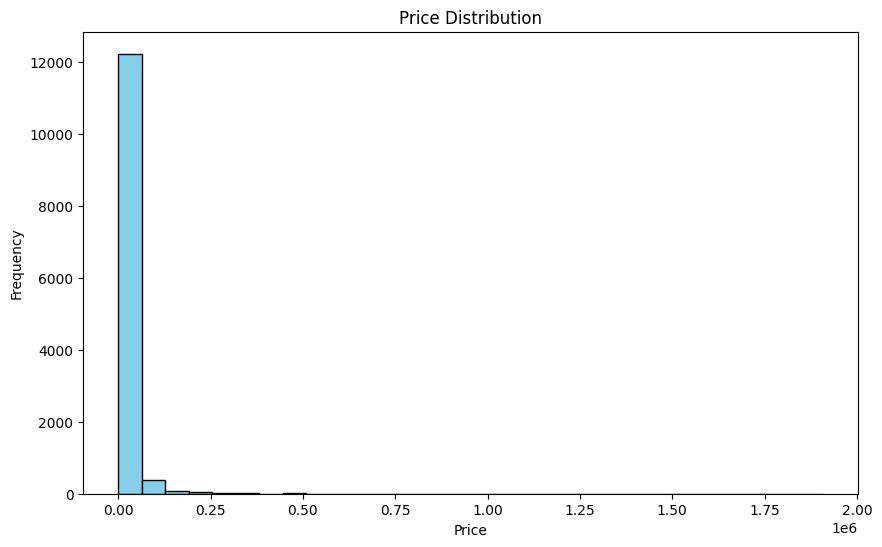

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Boxplot for price distribution

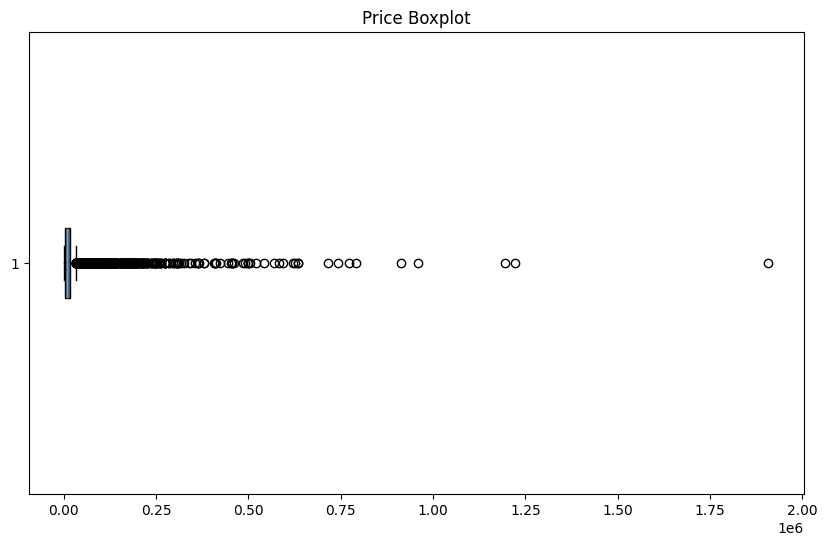

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True)
plt.title('Price Boxplot')
plt.show()


## Data type of numerical features

In [ ]:
# data type of 'rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios'

print(df[['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios']].dtypes)


rating       object
reviews      object
bathrooms     int64
beds          int64
guests        int64
toiles        int64
bedrooms      int64
studios       int64
dtype: object


## Changing data type of 'rating' & 'reviews' features

In [ ]:
# make rating to float and reviews to int

import pandas as pd

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce').astype('Int64')

print(df[['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios']].dtypes)


rating       float64
reviews        Int64
bathrooms      int64
beds           int64
guests         int64
toiles         int64
bedrooms       int64
studios        int64
dtype: object


## Histogram visualization of numerical features

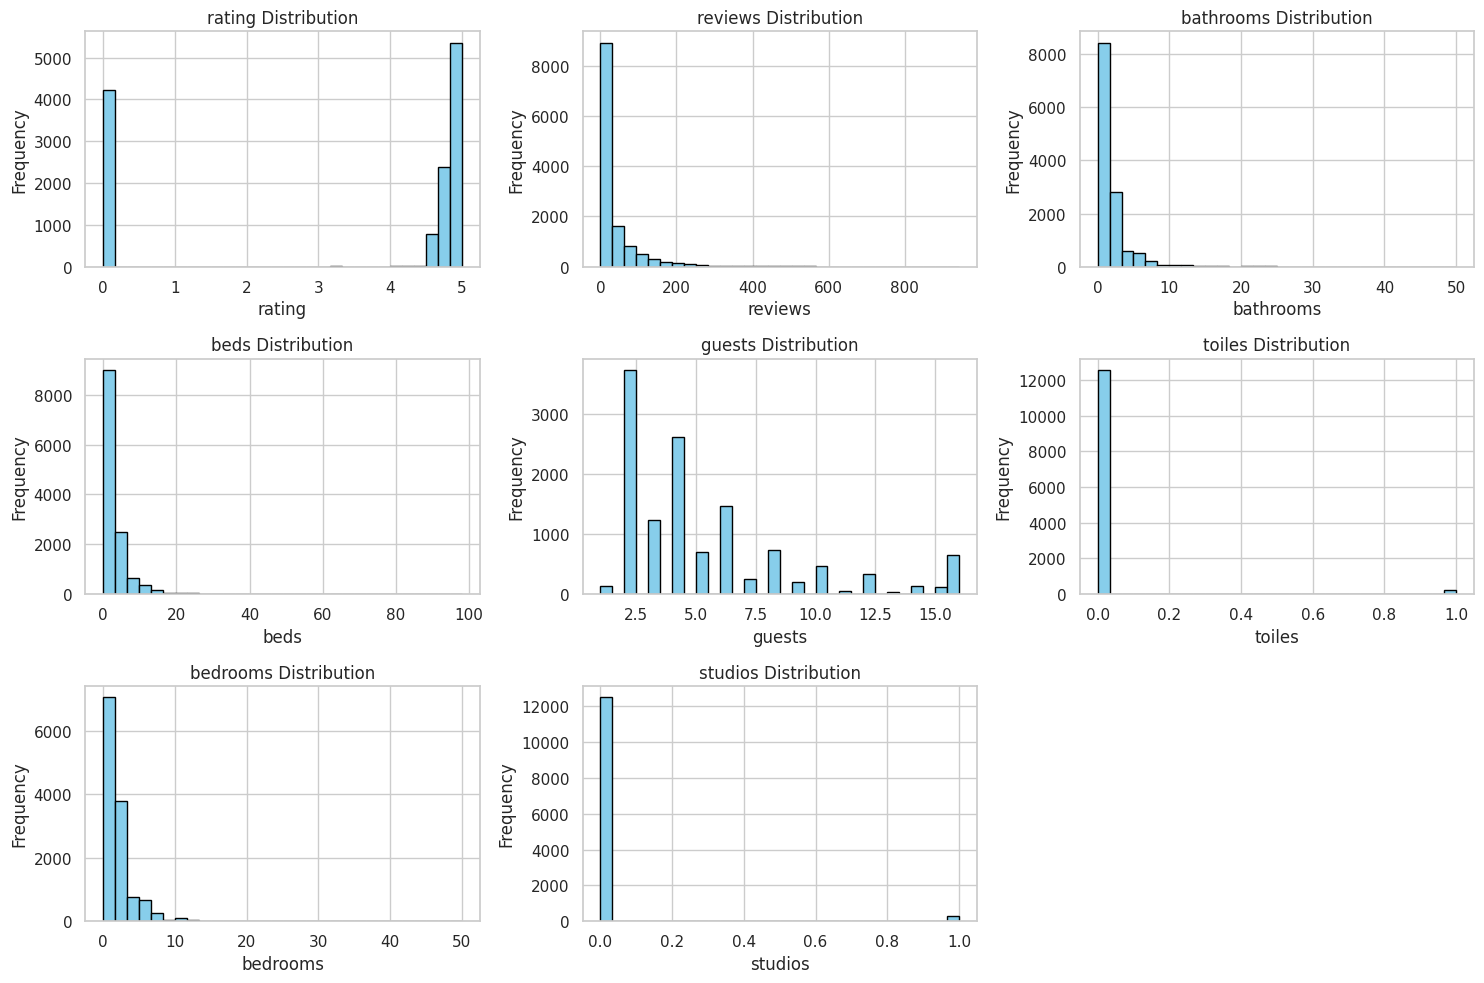

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_columns = ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()


## Boxplot visualization of numerical features

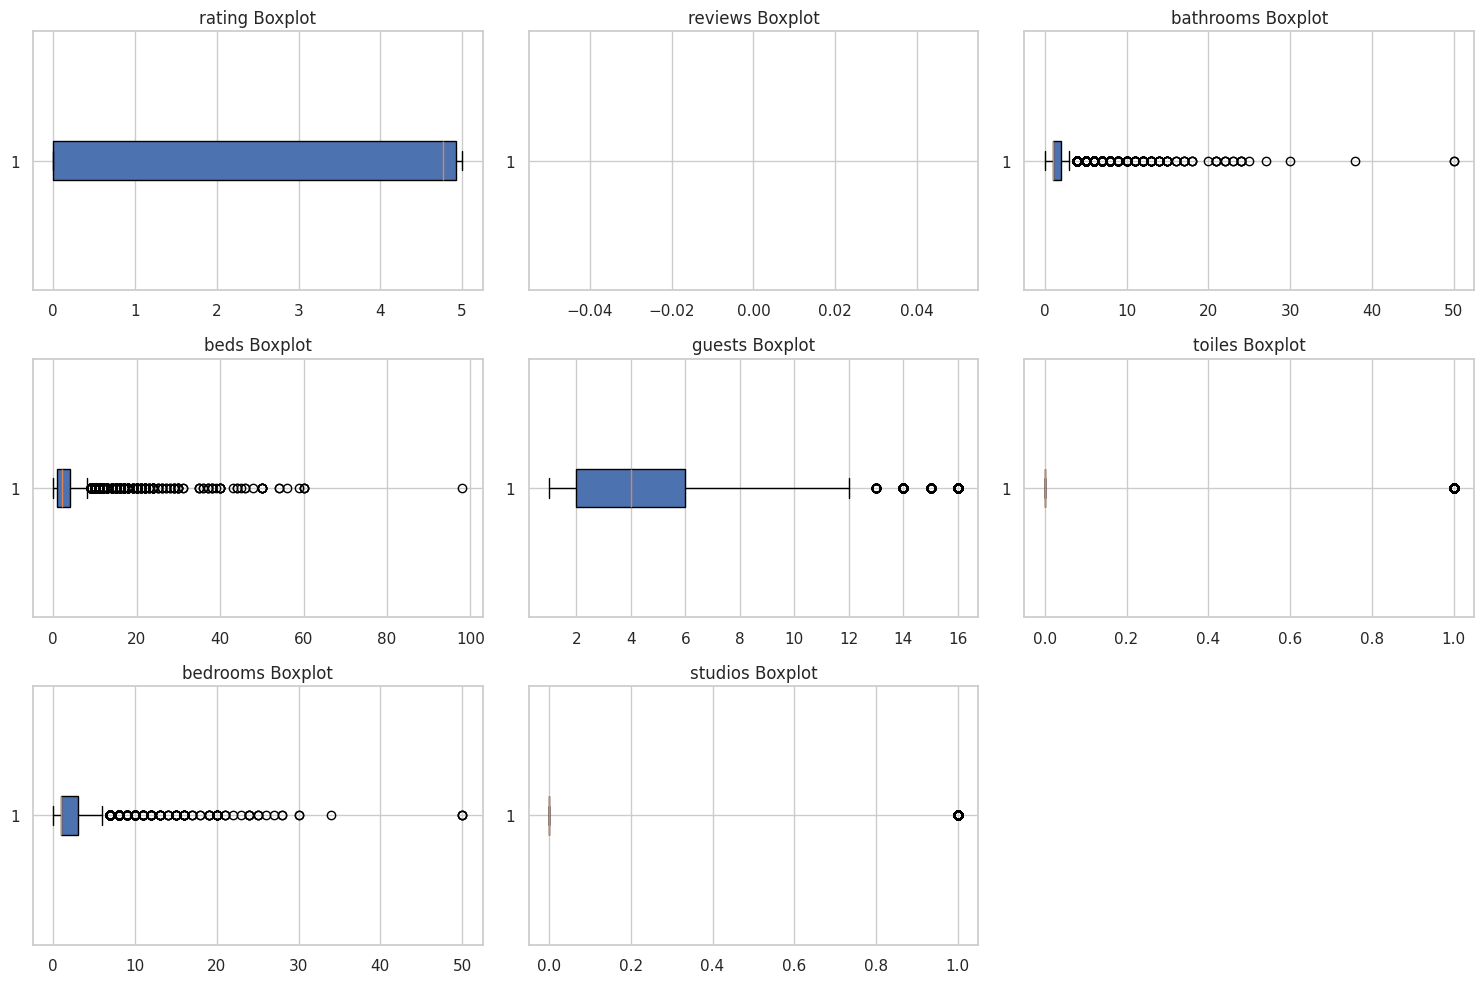

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[column], vert=False, patch_artist=True)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()


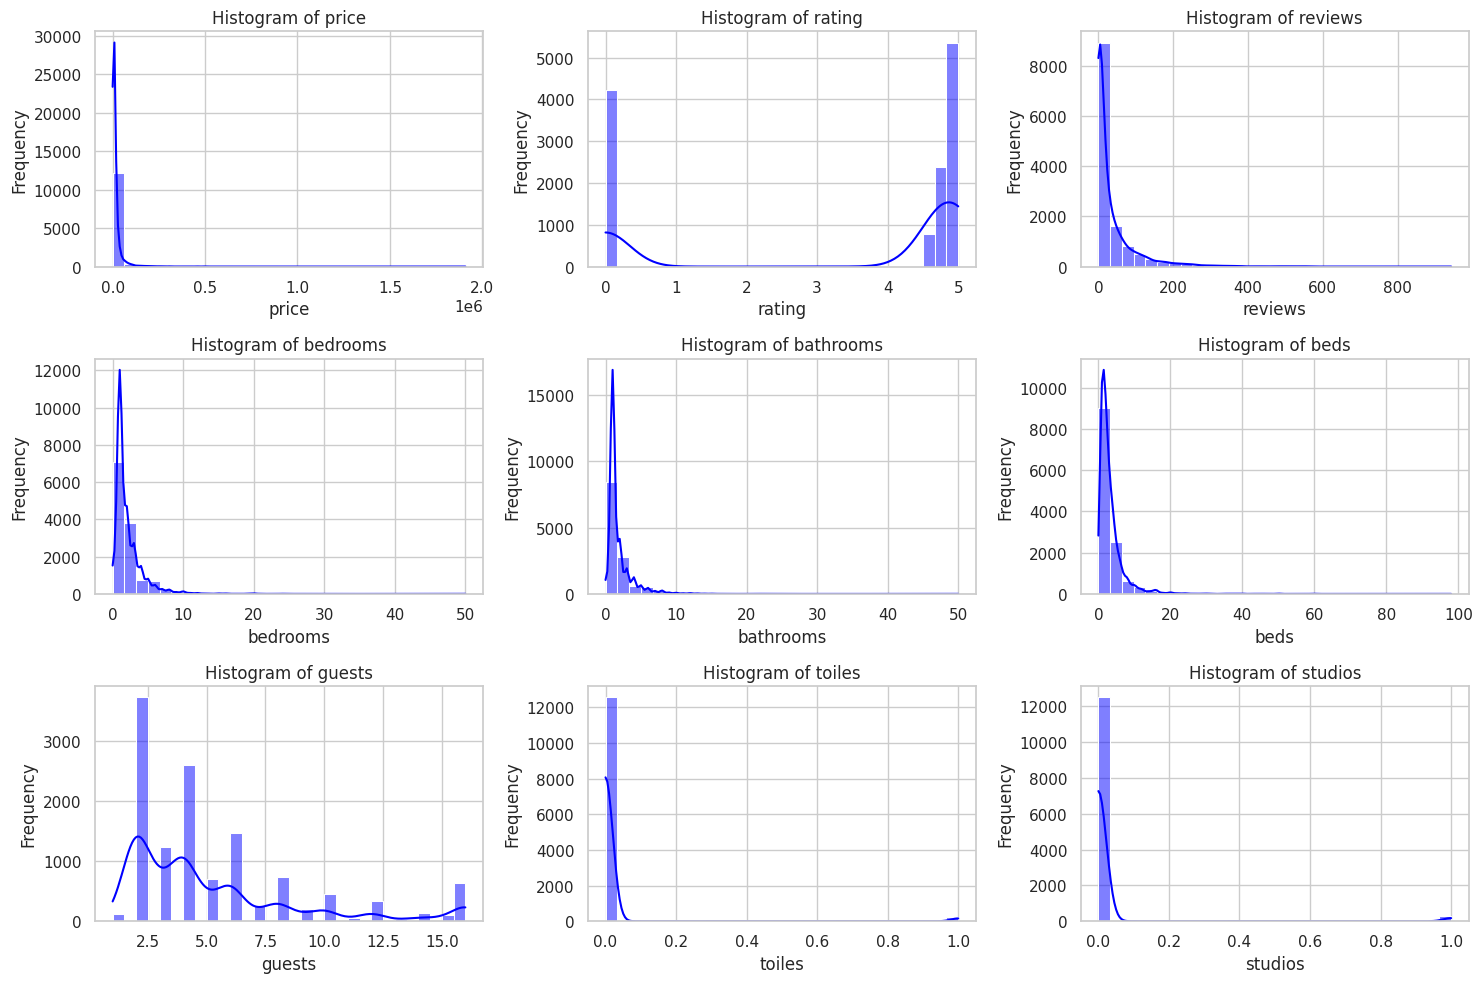

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numeric_columns = ['price', 'rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests', 'toiles', 'studios']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    # Histogram
    sns.histplot(df[column], kde=True, ax=axes[i], color='blue', bins=30)
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


## Correlation matrix between 'price' & other numerical features

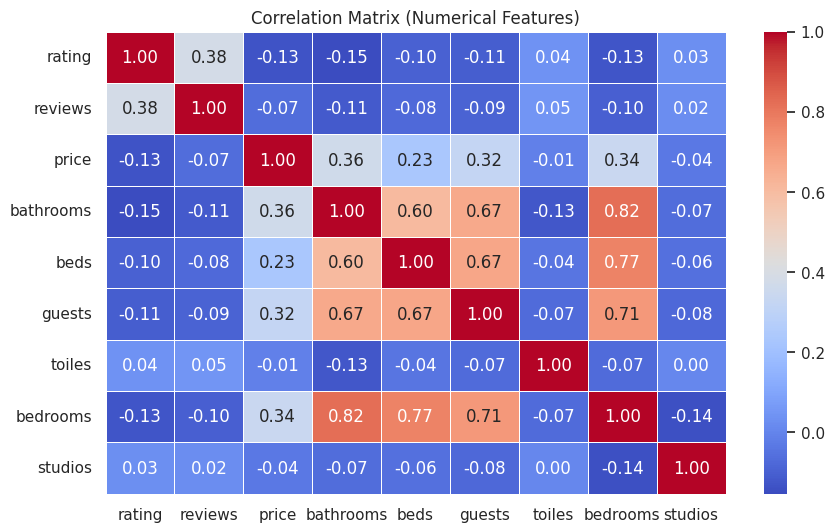

In [ ]:
import seaborn as sns

numerical_columns = ['rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios']

correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


## Highest, lowest, and median price

In [ ]:
highest_price = df['price'].max()
lowest_price = df['price'].min()
median_price = df['price'].median()

print(f"Highest Price: {highest_price}")
print(f"Lowest Price: {lowest_price}")
print(f"Median Price: {median_price}")


Highest Price: 1907963
Lowest Price: 393
Median Price: 8175.0


## Visualization of 'price' with 'host_name'

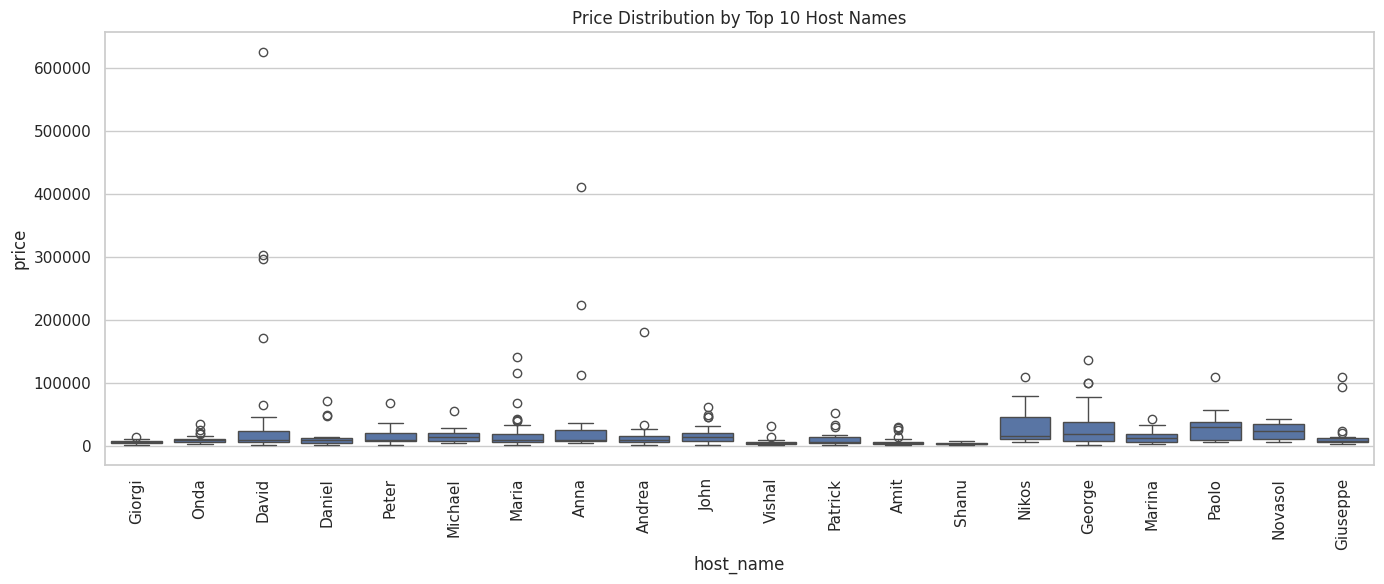

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_host_names = df['host_name'].value_counts().head(20).index # Changed df_clean to df
df_top_hosts = df[df['host_name'].isin(top_host_names)] # Changed df_clean to df

# Set up the figure
plt.figure(figsize=(14, 6))

# Bar plot for 'host_name' vs 'price' for the top 10 hosts
sns.boxplot(x='host_name', y='price', data=df_top_hosts)
plt.xticks(rotation=90)
plt.title('Price Distribution by Top 10 Host Names')
plt.tight_layout()
plt.show()

## Visualization of 'price' with 'country'

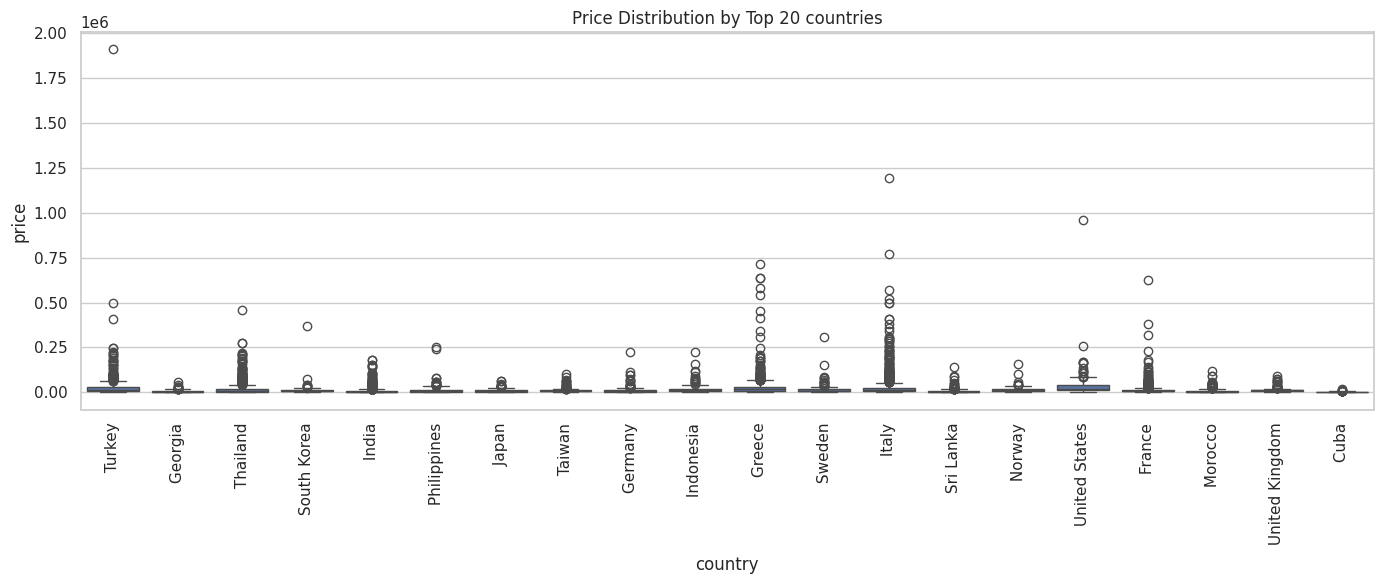

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_host_names = df['country'].value_counts().head(20).index # Changed df_clean to df
df_top_hosts = df[df['country'].isin(top_host_names)] # Changed df_clean to df

# Set up the figure
plt.figure(figsize=(14, 6))

# Bar plot for 'host_name' vs 'price' for the top 10 hosts
sns.boxplot(x='country', y='price', data=df_top_hosts)
plt.xticks(rotation=90)
plt.title('Price Distribution by Top 20 countries')
plt.tight_layout()
plt.show()

## Visualization of 'price' with 'features' & 'amenities'

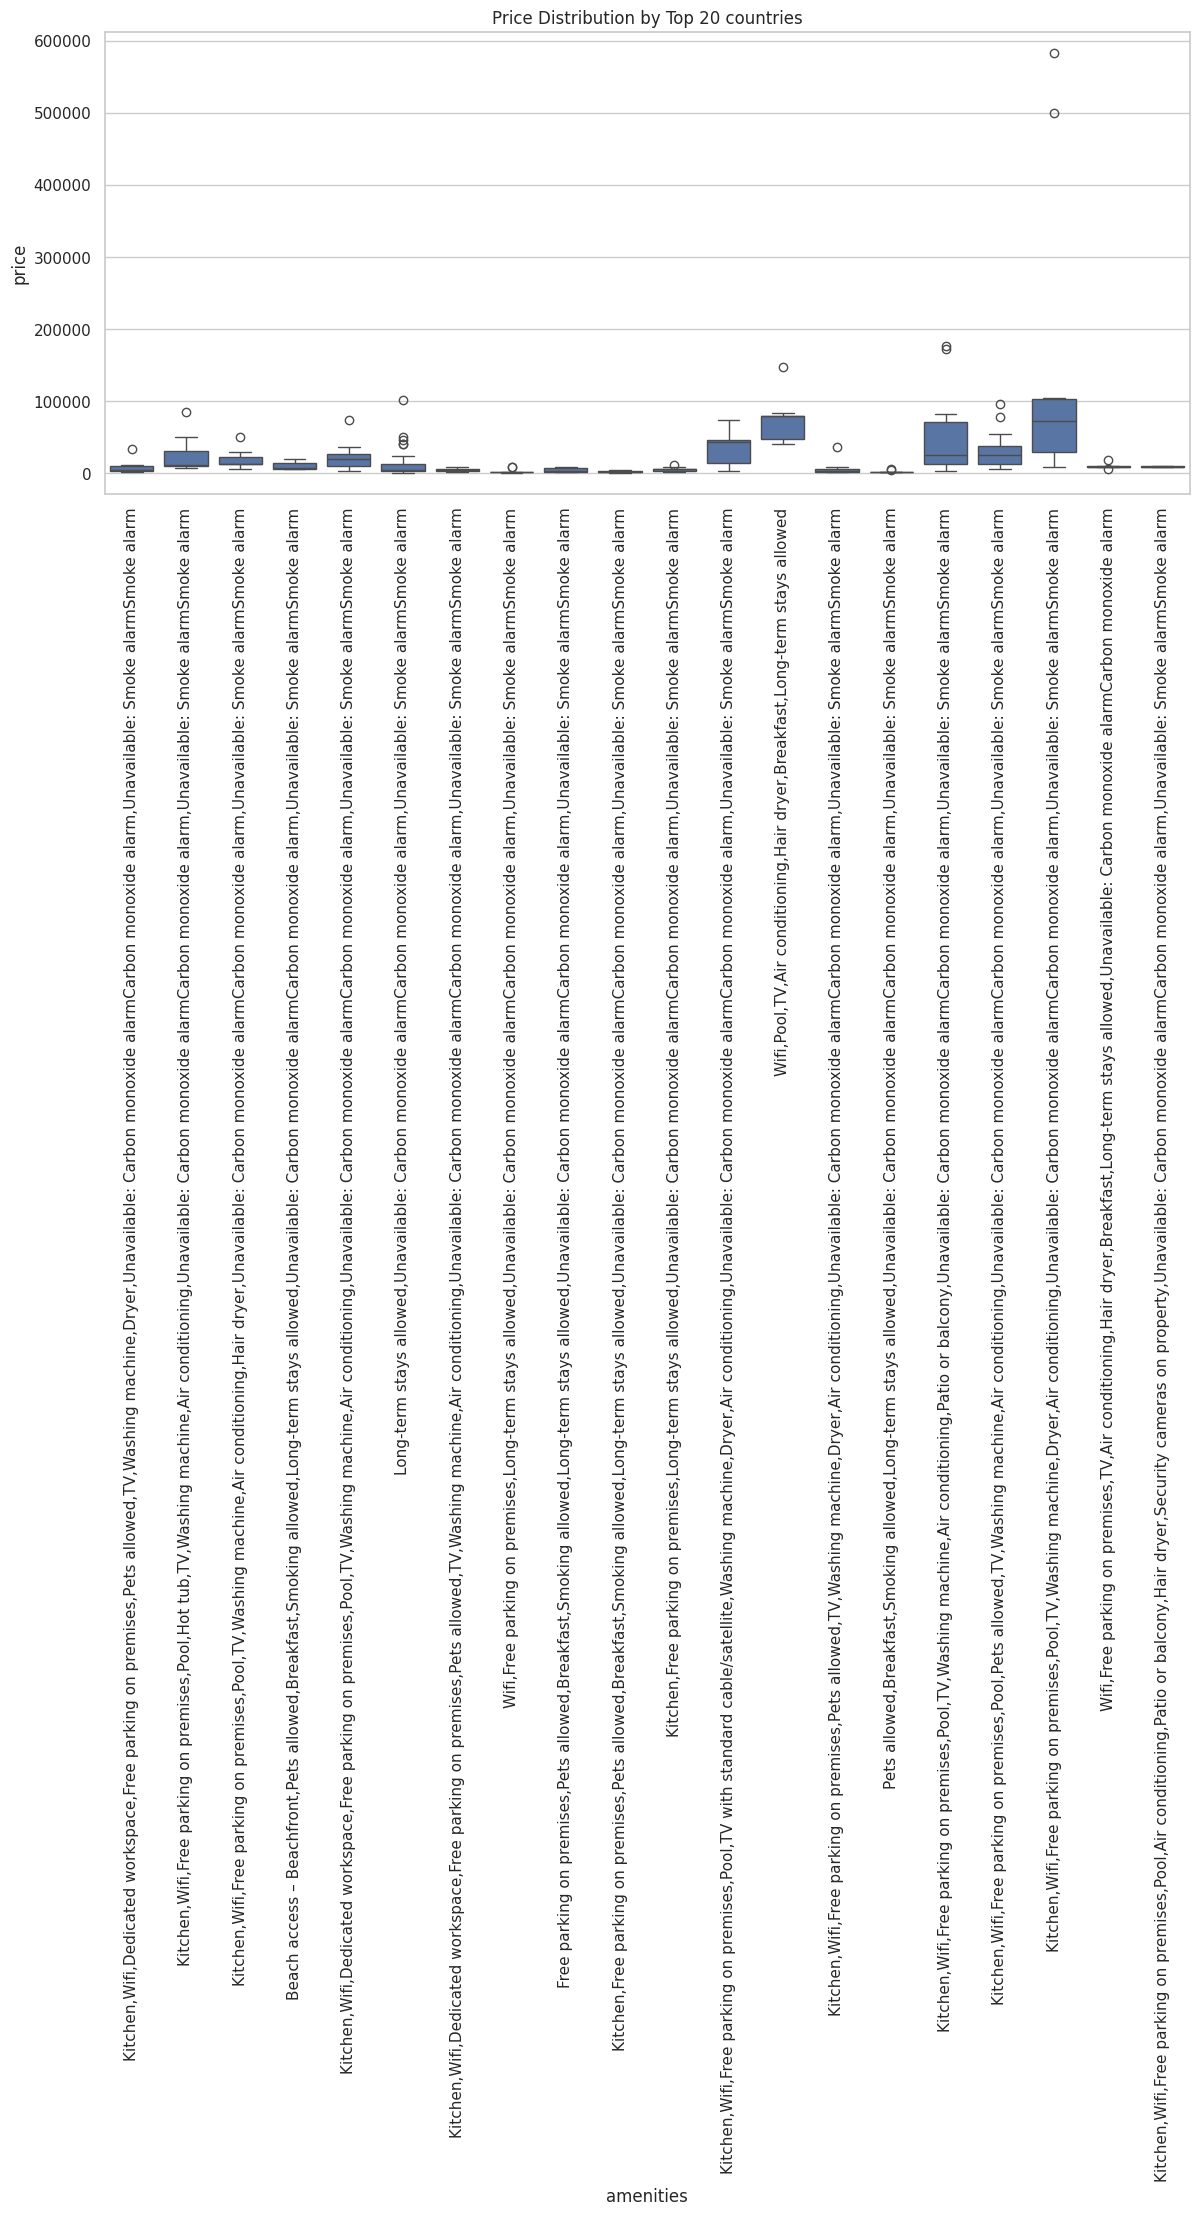

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_host_names = df['amenities'].value_counts().head(20).index # Changed df_clean to df
df_top_hosts = df[df['amenities'].isin(top_host_names)] # Changed df_clean to df

# Set up the figure
plt.figure(figsize=(14, 6))

# Bar plot for 'host_name' vs 'price' for the top 10 hosts
sns.boxplot(x='amenities', y='price', data=df_top_hosts)
plt.xticks(rotation=90)
plt.title('Price Distribution by Top 20 countries')
plt.tight_layout()
plt.show()

## Choropleth map for countries

In [ ]:
import plotly.express as px

# Count the number of listings per country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.choropleth(country_counts,
                    locations="country",
                    locationmode='country names',
                    color="count",
                    hover_name="country",
                    color_continuous_scale="Viridis",
                    title="Distribution of Airbnb Listings by Country",
                    projection="natural earth")

# Show the figure
fig.show()


# **Data handling & cleaning**

## Handling outlier for 'price'

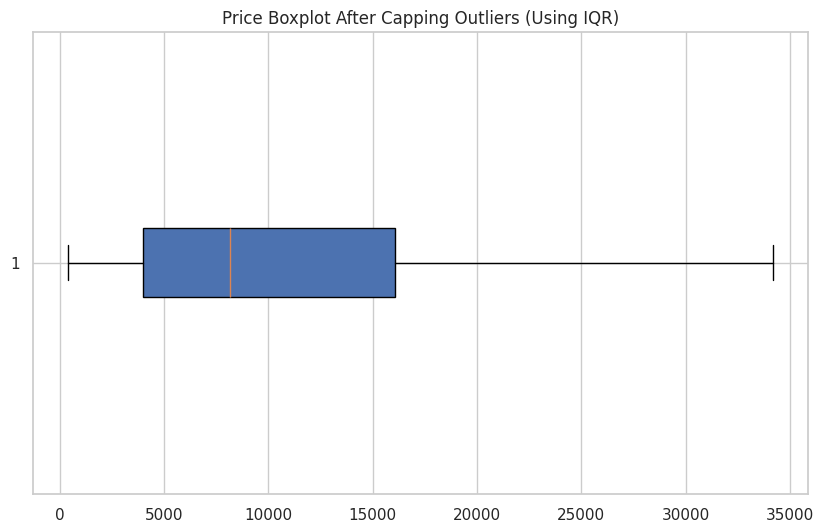

In [ ]:
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate the lower and upper bounds using IQR for 'price'
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Cap the 'price' column by replacing outliers with the bounds
df['price'] = df['price'].clip(lower=lower_bound_price, upper=upper_bound_price)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True)
plt.title('Price Boxplot After Capping Outliers (Using IQR)')
plt.show()


## Handling outlier for numerical features

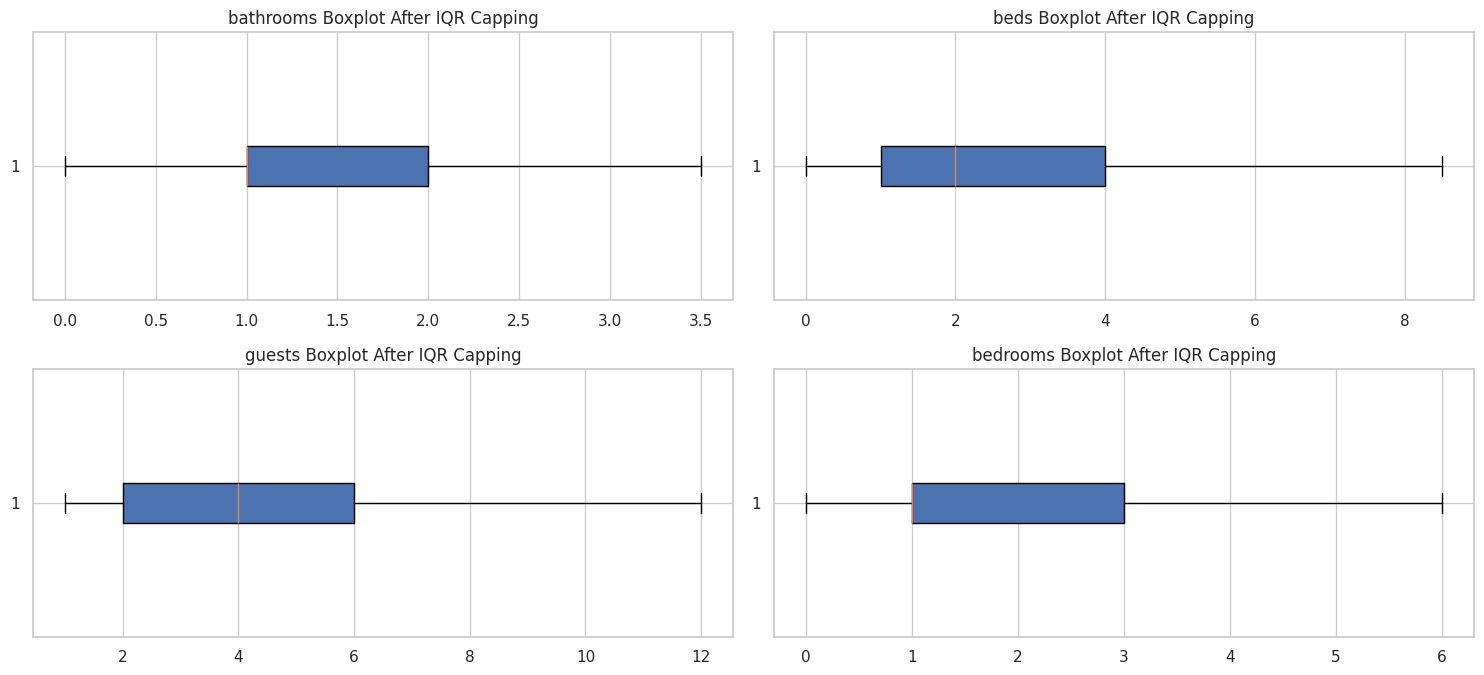

In [ ]:
columns_to_check = ['bathrooms', 'beds', 'guests', 'bedrooms']

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 2, i)
    plt.boxplot(df[column], vert=False, patch_artist=True)
    plt.title(f'{column} Boxplot After IQR Capping')

plt.tight_layout()
plt.show()


## Handling the missing value of 'host_name'

In [ ]:
df['host_name'].fillna('Unknown', inplace=True)

## Handling the missing value of 'checkin & checkout'

In [ ]:
df['checkin'].fillna(df['checkin'].mode()[0], inplace=True)

df['checkout'].fillna('12:00 pm', inplace=True)

missing_values_after = df.isnull().sum()
print(missing_values_after)

Unnamed: 0      0
id              0
name            0
rating          0
reviews         1
host_name       0
host_id         0
address         0
features        0
amenities       0
safety_rules    0
hourse_rules    0
img_links       0
price           0
country         0
bathrooms       0
beds            0
guests          0
toiles          0
bedrooms        0
studios         0
checkin         0
checkout        0
dtype: int64


## Handling the missing values of 'reviews' features

In [ ]:
missing_reviews_rows = df[df['reviews'].isnull()]

missing_reviews_rows.index
df.iloc[330]


Unnamed: 0                                                    330
id                                                       28824091
name                          Fossatún Camping Pods - Camping Pod
rating                                                       4.78
reviews                                                      <NA>
host_name                                            Steinar Berg
host_id                                                 6368141.0
address                                        Borgarnes, Iceland
features               2 guests,1 bedroom,1 bed,1 shared bathroom
amenities       Wifi,Free parking on premises,Private hot tub,...
safety_rules    󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...
hourse_rules    Check-in: 4:00 pm - 8:00 pm,Check out: 11:00 a...
img_links       https://a0.muscache.com/im/pictures/5c8f4845-e...
price                                                        4013
country                                                   Iceland
bathrooms                                                     1.0
beds                                                          1.0
guests                                                          2
toiles                                                          0
bedrooms                                                        1
studios                                                         0
checkin                                         4 00 pm - 8 00 pm
checkout                                                 11 00 am
Name: 330, dtype: object

In [ ]:
df['reviews'].fillna(1003, inplace=True)

print(df['reviews'].isnull().sum())


0


## Checking for missing values after handling

<Axes: >

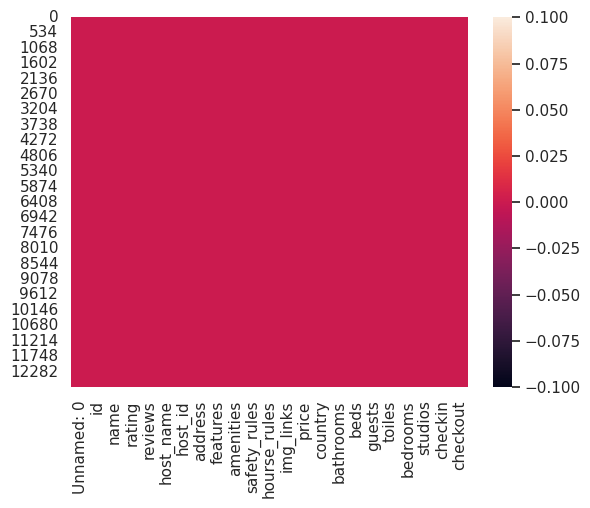

In [ ]:
sns.heatmap(df[df.columns].isna() )

## Create Binary Features for Flexibility in 'checkin' & 'checkout' features

In [ ]:
# Step 1: Create Binary Features for Flexibility
df['checkin_flexible'] = df['checkin'].apply(lambda x: 1 if 'Flexible' in str(x) else 0)
df['checkout_flexible'] = df['checkout'].apply(lambda x: 1 if 'Flexible' in str(x) else 0)

def clean_time_string(time_str):
    if isinstance(time_str, str):

        time_str = time_str.replace(' ', '').replace('pm', ' PM').replace('am', ' AM')
        return time_str
    return np.nan


def time_range_to_minutes(time_str):
    if isinstance(time_str, str) and '-' in time_str:
        time_range = time_str.split(' - ')


        start_time_str = time_range[0].strip()
        if len(start_time_str.split()[0]) == 1:
            start_time_str = '0' + start_time_str

        end_time_str = time_range[1].strip()
        if len(end_time_str.split()[0]) == 1:
            end_time_str = '0' + end_time_str

        start_time = pd.to_datetime(start_time_str, format='%I %M %p', errors='coerce')
        end_time = pd.to_datetime(end_time_str, format='%I %M %p', errors='coerce')

        if pd.isnull(start_time) or pd.isnull(end_time):
            return np.nan

        return (end_time - start_time).seconds / 60
    return np.nan

# Step 2: Handle non-range times (e.g., "After 2 00 pm")
def handle_non_range_times(time_str, default_time="12:00 pm"):
    if isinstance(time_str, str) and ('pm' in time_str or 'am' in time_str):
        time_str = clean_time_string(time_str)
        start_time = pd.to_datetime(default_time, format='%I:%M %p')
        end_time = pd.to_datetime(time_str, format='%I:%M %p')
        return (end_time - start_time).seconds / 60
    return np.nan

df['checkin_duration'] = df['checkin'].apply(lambda x: time_range_to_minutes(x) if 'pm' in str(x) or 'am' in str(x) else handle_non_range_times(x))
df['checkout_duration'] = df['checkout'].apply(lambda x: time_range_to_minutes(x) if 'pm' in str(x) or 'am' in str(x) else handle_non_range_times(x))


df.drop(columns=['checkin_duration', 'checkout_duration'], inplace=True)

# Step 3: Handle Missing Values

df['checkin'].fillna('Flexible', inplace=True)
df['checkout'].fillna('12:00 pm', inplace=True)


print(df[['checkin', 'checkout', 'checkin_flexible', 'checkout_flexible']].head())


               checkin   checkout  checkin_flexible  checkout_flexible
0             Flexible   12 00 pm                 1                  0
1   4 00 pm - 11 00 pm   10 00 am                 0                  0
2        After 1 00 pm   12 00 pm                 0                  0
3        After 2 00 pm   12 00 pm                 0                  0
4        After 2 00 pm   12 00 pm                 0                  0


## Correlation matrix between 'price' & other numerical features after data handling

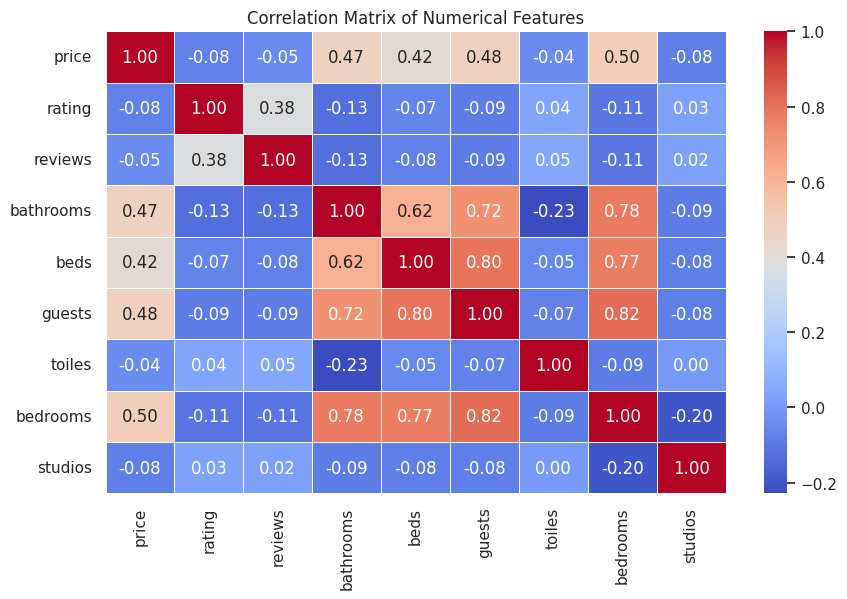

In [ ]:
numerical_columns = ['price', 'rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios']

# Calculate the correlation matrix for the selected numerical columns
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Drop uneccessary features

In [ ]:
# drop 'Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',

df = df.drop(['Unnamed: 0', 'img_links','id', 'host_id','safety_rules','checkin', 'checkout','hourse_rules'], axis=1)

In [ ]:
df.columns

Index(['name', 'rating', 'reviews', 'host_name', 'address', 'features',
       'amenities', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin_flexible',
       'checkout_flexible'],
      dtype='object')

# **Data Preprocessing**

## Categorical encoding (one - hot encoding) on categorical features

## Feature Engineering

In [ ]:
# Apply feature engineering for making three new features

df['price_per_guest'] = df['price'] / df['guests']
df['price_per_bed'] = df['price'] / df['beds']
df['price_per_bedrooms'] = df['price'] / df['bedrooms']

In [ ]:
df.head()
df.columns

Index(['name', 'rating', 'reviews', 'host_name', 'address', 'features',
       'amenities', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin_flexible',
       'checkout_flexible', 'price_per_guest', 'price_per_bed',
       'price_per_bedrooms'],
      dtype='object')

In [ ]:
# Step 1: Select categorical columns for One-Hot Encoding
categorical_columns = ['host_name', 'country', 'features', 'amenities','name','address']  # Add other categorical columns if necessary

# Step 2: Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Verify the result
print(df_encoded.head())


   rating  reviews  price  bathrooms  beds  guests  toiles  bedrooms  studios  \
0    4.71       64   8078        1.0   1.0       2       0         2        0   
1    0.00        0   4665        2.0   2.0       4       0         2        0   
2    4.85       68   5991        1.0   3.0       4       0         1        0   
3    5.00       13  11339        1.0   2.0       4       0         1        0   
4    0.00        0   6673        1.0   1.0       2       0         1        0   

   checkin_flexible  checkout_flexible  price_per_guest  price_per_bed  \
0                 1                  0          4039.00         8078.0   
1                 0                  0          1166.25         2332.5   
2                 0                  0          1497.75         1997.0   
3                 0                  0          2834.75         5669.5   
4                 0                  0          3336.50         6673.0   

   price_per_bedrooms  host_name_(Email Hidden By Airbnb)  host_name

## Log transformation of 'price'

In [ ]:
df_encoded['log_price'] = np.log1p(df_encoded['price'])  # np.log1p to handle log(0)

In [ ]:
print(df_encoded.columns)

Index(['rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'toiles',
       'bedrooms', 'studios', 'checkin_flexible',
       ...
       'address_高松市, 香川県, Japan', 'address_高雄市, 鳳山區, Taiwan',
       'address_魚池鄉, 南投縣, Taiwan', 'address_鳳山區, 高雄市, Taiwan',
       'address_가평군, 경기, South Korea', 'address_공주시, 충남, South Korea',
       'address_서울특별시, Seoul, South Korea', 'address_양평군, 경기도, South Korea',
       'address_연천군, 경기도, South Korea', 'log_price'],
      dtype='object', length=40176)


## Make the  continous target features 'price' to a discrete target feature

In [ ]:
#M ake continuous target features 'price' to a discrete target feature with assessing 10 classes

bins = np.linspace(np.log1p(393), np.log1p(34000), num=11)  # Log transformation on 393 and 34000

labels = [str(i) for i in range(1, 11)]

bins = np.concatenate([bins, [np.log1p(34000) + 1]])
labels = labels + [str(len(labels) + 1)]


df_encoded['price_category'] = pd.cut(df_encoded['log_price'], bins=bins, labels=labels, right=False)
print(df_encoded[['price', 'log_price', 'price_category']].head())

   price  log_price price_category
0   8078   8.997023              7
1   4665   8.448057              6
2   5991   8.698181              7
3  11339   9.336092              8
4   6673   8.805975              7


In [ ]:
# Apply feature engineering for making three new features

df['price_per_guest'] = df['price'] / df['guests']
df['price_per_bed'] = df['price'] / df['beds']
df['price_per_bedrooms'] = df['price'] / df['bedrooms']

In [ ]:
df.head()
df.columns

Index(['name', 'rating', 'reviews', 'host_name', 'address', 'features',
       'amenities', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin_flexible',
       'checkout_flexible', 'price_per_guest', 'price_per_bed',
       'price_per_bedrooms'],
      dtype='object')

## Dimensionality Reduction with PCA

In [ ]:
# Dimensionality Reduction and Data Preprocessing with PCA for Feature Scaling and Imputation

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Replace infinite values with NaN
X = df_encoded.select_dtypes(include=[np.number])  # Select numeric columns

X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Impute missing values (NaN) with the median or mean
X.fillna(X.median(), inplace=True)

# Step 3: Normalize the data by scaling it (optional but recommended for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA for dimensionality reduction (retain 95% of variance)
pca = PCA(n_components=0.98)
X_reduced = pca.fit_transform(X_scaled)

# Step 5: Convert the PCA result back into DataFrame
df_reduced = pd.DataFrame(X_reduced, columns=[f'PCA_{i+1}' for i in range(X_reduced.shape[1])])

print(df_reduced.head())


      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -1.008919  0.705944  0.025787  1.537197 -1.944917  2.714690 -0.091761   
1 -0.845353 -1.053334 -1.372576 -0.236325  0.083860 -0.609708  0.646049   
2 -1.176493 -0.166881  0.815761 -0.125053 -0.164773 -0.327425 -0.168306   
3 -0.316215  1.088525  0.214627 -0.122470 -0.142113 -0.247856 -0.850997   
4 -1.056550  0.950530 -1.555308 -0.145674  0.001482 -0.534908  0.585118   

      PCA_8     PCA_9    PCA_10    PCA_11  
0  0.521755 -0.090464 -0.598119 -0.779621  
1  0.513007 -0.182792 -0.192705  0.129534  
2 -0.603450 -0.099886 -0.004451  0.242646  
3 -0.507107 -0.364501  0.211750  0.228229  
4  0.065011 -0.075432 -0.216107 -0.157093  


## Visualizing Cumulative Explained Variance of PCA Components

Explained Variance Ratio per Component: [0.2933996  0.25494573 0.09741078 0.07332127 0.07072391 0.0683782
 0.04445212 0.02894897 0.01920263 0.01730359 0.01426051]
Cumulative Explained Variance: [0.2933996  0.54834533 0.64575611 0.71907738 0.78980129 0.85817949
 0.90263161 0.93158058 0.95078321 0.9680868  0.98234732]


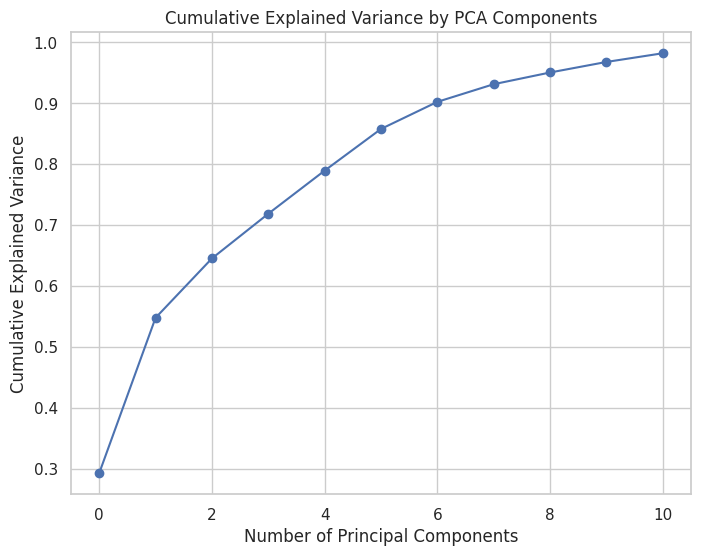

In [ ]:
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio per Component:", explained_variance)
print("Cumulative Explained Variance:", np.cumsum(explained_variance))

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


## Reconstructing Data from PCA Components and Comparing with Original Data

In [ ]:
X_reconstructed = pca.inverse_transform(X_reduced)

print("Original Data (First Few Rows):")
print(X.head())

print("Reconstructed Data (First Few Rows):")
print(pd.DataFrame(X_reconstructed, columns=X.columns).head())



Original Data (First Few Rows):
   rating  reviews  price  bathrooms  beds  guests  toiles  bedrooms  studios  \
0    4.71       64   8078        1.0   1.0       2       0         2        0   
1    0.00        0   4665        2.0   2.0       4       0         2        0   
2    4.85       68   5991        1.0   3.0       4       0         1        0   
3    5.00       13  11339        1.0   2.0       4       0         1        0   
4    0.00        0   6673        1.0   1.0       2       0         1        0   

   checkin_flexible  checkout_flexible  price_per_guest  price_per_bed  \
0                 1                  0          4039.00         8078.0   
1                 0                  0          1166.25         2332.5   
2                 0                  0          1497.75         1997.0   
3                 0                  0          2834.75         5669.5   
4                 0                  0          3336.50         6673.0   

   price_per_bedrooms  log_price  
0

In [ ]:
print(X.isnull().sum())

rating                0
reviews               0
price                 0
bathrooms             0
beds                  0
guests                0
toiles                0
bedrooms              0
studios               0
checkin_flexible      0
checkout_flexible     0
price_per_guest       0
price_per_bed         0
price_per_bedrooms    0
log_price             0
dtype: int64


In [ ]:
# chcek  missing vakues in 'price', 'price_category', 'log_price'
missing_price = df_encoded['price'].isnull().sum()
missing_price_category = df_encoded['price_category'].isnull().sum()
missing_log_price = df_encoded['log_price'].isnull().sum()

print(f"Missing values in 'price': {missing_price}")
print(f"Missing values in 'price_category': {missing_price_category}")
print(f"Missing values in 'log_price': {missing_log_price}")


Missing values in 'price': 0
Missing values in 'price_category': 0
Missing values in 'log_price': 0


## Feature Scaling with StandardScaler for Z-Score Standardization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming df_encoded is the DataFrame with the necessary columns
features_to_scale = ['price_per_bedrooms', 'price_per_guest', 'price_per_bed',
                     'guests', 'bedrooms', 'beds', 'bathrooms', 'reviews', 'rating']

# Replace infinite values with NaN before scaling
df_encoded[features_to_scale] = df_encoded[features_to_scale].replace([np.inf, -np.inf], np.nan)

# Initialize the StandardScaler
scaler = StandardScaler()

#transform the data
scaled_data = scaler.fit_transform(df_encoded[features_to_scale])
#df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale].dropna()) #This line is changed
df_encoded[features_to_scale] = pd.DataFrame(scaled_data, columns=features_to_scale, index=df_encoded.index) #Creating new dataframe and using it to update orignal dataframe
#df_encoded[features_to_scale] = df_encoded[features_to_scale].fillna(df_encoded[features_to_scale].mean())

# Display the result to verify
print(df_encoded[features_to_scale].head())

   price_per_bedrooms  price_per_guest  price_per_bed    guests  bedrooms  \
0           -0.454278         0.532211       0.588925 -0.931084  0.025262   
1           -0.751324        -0.625303      -0.546360 -0.302871  0.025262   
2           -0.114499        -0.491732      -0.612653 -0.302871 -0.632228   
3            0.816413         0.046984       0.113016 -0.302871 -0.632228   
4            0.004215         0.249154       0.311303 -0.931084 -0.632228   

       beds  bathrooms   reviews    rating  
0 -0.861512  -0.583818  0.421640  0.638012  
1 -0.414651   0.465416 -0.546953 -1.419984  
2  0.032210  -0.583818  0.482177  0.699184  
3 -0.414651  -0.583818 -0.350207  0.764725  
4 -0.861512  -0.583818 -0.546953 -1.419984  


## Identifying feature importance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'df_encoded' has already been preprocessed and 'price_category' is the target variable
X = df_encoded.drop(columns=['price', 'price_category', 'log_price'])  # Exclude non-relevant columns
y = df_encoded['price_category']  # Target variable

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the median (or mean) of the column
# You can choose a different imputation strategy if needed
X.fillna(X.median(), inplace=True)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance values
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})


                                                Feature  Importance
12                                   price_per_bedrooms    0.084642
10                                      price_per_guest    0.075494
11                                        price_per_bed    0.066095
4                                                guests    0.029533
6                                              bedrooms    0.025554
3                                                  beds    0.024414
2                                             bathrooms    0.016845
1                                               reviews    0.015983
0                                                rating    0.013304
6892                                     country_ India    0.006725
8230  features_2 guests,1 bedroom,1 bed,1 private ba...    0.003749
8229       features_2 guests,1 bedroom,1 bed,1 bathroom    0.003577
8                                      checkin_flexible    0.002733
6884                                    country_

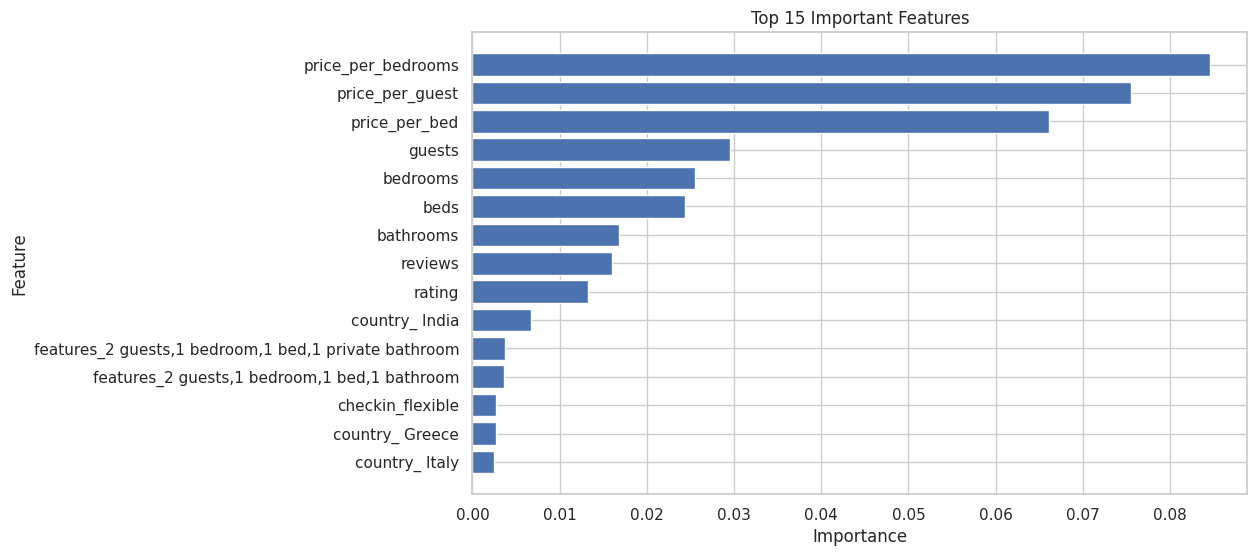

In [ ]:
features_df = features_df.sort_values(by='Importance', ascending=False)

# Print or visualize the top N important features
top_n = 15
print(features_df.head(top_n))

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'][:top_n], features_df['Importance'][:top_n])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Important Features")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Get the indices where 'price_category' has missing values
missing_price_category_indices = df_encoded[df_encoded['price_category'].isnull()].index

# Print all columns for those rows
df_encoded.loc[missing_price_category_indices]


Empty DataFrame
Columns: [rating, reviews, price, bathrooms, beds, guests, toiles, bedrooms, studios, checkin_flexible, checkout_flexible, price_per_guest, price_per_bed, price_per_bedrooms, host_name_(Email Hidden By Airbnb), host_name_), host_name_- Wir Sind Dani & Arno, host_name_0mar, host_name_17Broga, host_name_23Havens, host_name_2peace, host_name_7 Mirror BNB, host_name_A, host_name_A .B .S Naidu, host_name_A Casa, host_name_A Franziska Dora, host_name_A-Tai, host_name_Aakaash, host_name_Aakash, host_name_Aakash Brahmanand, host_name_Aamir, host_name_Aaron, host_name_Aarti, host_name_Aashild, host_name_Aashish, host_name_Aashna, host_name_Aasim, host_name_Aastha, host_name_Aayush, host_name_Abbas, host_name_Abdallah, host_name_Abdelilah, host_name_Abdelshakour, host_name_Abdessadeq, host_name_Abdo, host_name_Abdul Rashid, host_name_Abdulla, host_name_Abdullah, host_name_Abdulrahman, host_name_Abelis, host_name_Abhay, host_name_Abhijit, host_name_Abhilash, host_name_Abhimanyu, host_name_Abhimanyu Singh, host_name_Abhinav, host_name_Abhiraj, host_name_Abhishek, host_name_Abi, host_name_Abid, host_name_Abigail, host_name_Abir, host_name_Abitare Holiday Homes, host_name_Abitare I Paduli, host_name_Acelia, host_name_Achim, host_name_Achla, host_name_Achy, host_name_Acmp, host_name_Acquafonda, host_name_Acropolis Cave, host_name_Act, host_name_Ada, host_name_Adalberto, host_name_Adam, host_name_Adam & Rebecca, host_name_Adam & Sarah, host_name_Adarsh, host_name_Addey Azman, host_name_Adel, host_name_Adele, host_name_Adeline, host_name_Adem, host_name_Adi Osher, host_name_Adil, host_name_Adir, host_name_Adish, host_name_Adita, host_name_Adith, host_name_Aditya, host_name_Aditya Vikram, host_name_Adiyabold, host_name_Adobe Home Chiangmai, host_name_Adriabnb, host_name_Adriagate, host_name_Adrian, host_name_Adrian And Claire, host_name_Adrian Sorin, host_name_Adrian Y Maitte, host_name_Adriana, ...]
Index: []

[0 rows x 40177 columns]

In [ ]:
df_encoded.columns

Index(['rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'toiles',
       'bedrooms', 'studios', 'checkin_flexible',
       ...
       'address_高雄市, 鳳山區, Taiwan', 'address_魚池鄉, 南投縣, Taiwan',
       'address_鳳山區, 高雄市, Taiwan', 'address_가평군, 경기, South Korea',
       'address_공주시, 충남, South Korea', 'address_서울특별시, Seoul, South Korea',
       'address_양평군, 경기도, South Korea', 'address_연천군, 경기도, South Korea',
       'log_price', 'price_category'],
      dtype='object', length=40177)

## Shape of new encoded dataframe & PCA

In [ ]:
print("Shape of df_encoded:", df_encoded.shape)
print("Number of original features in df_encoded:", df_encoded.shape[1])


Shape of df_encoded: (12805, 40177)
Number of original features in df_encoded: 40177


In [ ]:
print("Shape of PCA components:", pca.components_.shape)
print("Number of features in PCA components:", pca.components_.shape[1])


Shape of PCA components: (11, 15)
Number of features in PCA components: 15


## dimensionality reduction with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
X_reduced = pca.fit_transform(X_scaled)

# Check the number of components after dimensionality reduction for not crashing RAM
print("Shape of reduced PCA data:", X_reduced.shape)


Shape of reduced PCA data: (12805, 11)


## Exploring PCA Loadings and Feature Contribution per Component

In [ ]:
numeric_columns = df_encoded.select_dtypes(include=[np.number]).drop(columns=['price']).columns

# Check the number of features after PCA
print("Number of features in PCA components:", pca.components_.shape[1])

num_components = pca.components_.shape[0]
num_features = pca.components_.shape[1]

loading_columns = [f'Feature_{i}' for i in range(num_features)]

loading_df = pd.DataFrame(pca.components_, columns=loading_columns)

# View the loadings for the first few principal components
print("PCA Loadings for PCA_1:")
print(loading_df.iloc[0])  # PCA_1 loadings
print("\nPCA Loadings for PCA_2:")
print(loading_df.iloc[1])  # PCA_2 loadings

Number of features in PCA components: 15
PCA Loadings for PCA_1:
Feature_0    -6.775448e-02
Feature_1    -4.907306e-02
Feature_2     4.492599e-01
Feature_3     3.453164e-01
Feature_4     3.200668e-01
Feature_5     3.542382e-01
Feature_6    -5.715508e-02
Feature_7     3.642076e-01
Feature_8    -8.159162e-02
Feature_9    -4.190858e-02
Feature_10    8.271806e-25
Feature_11    2.113115e-01
Feature_12    1.876692e-01
Feature_13    2.128279e-01
Feature_14    4.177325e-01
Name: 0, dtype: float64

PCA Loadings for PCA_2:
Feature_0     0.043410
Feature_1     0.079280
Feature_2     0.143950
Feature_3    -0.260991
Feature_4    -0.309745
Feature_5    -0.301778
Feature_6     0.059621
Feature_7    -0.298047
Feature_8     0.026075
Feature_9    -0.082236
Feature_10   -0.000000
Feature_11    0.440336
Feature_12    0.443884
Feature_13    0.433944
Feature_14    0.192130
Name: 1, dtype: float64


In [ ]:

loading_importance = loading_df.abs().sum(axis=0).sort_values(ascending=False)

# Print the top features by importance
print("\nFeature Importance Based on PCA Loadings:")
print(loading_importance.head())



Feature Importance Based on PCA Loadings:
Feature_4     2.291432
Feature_3     2.206709
Feature_12    2.075758
Feature_8     2.059391
Feature_9     2.022150
dtype: float64


## Top features across all principal components after new reduced dataframe

In [ ]:

loading_df = pd.DataFrame(pca.components_, columns=df_encoded.select_dtypes(include=[np.number]).columns)

# View the loadings for the first few principal components
print("PCA Loadings for PCA_1:")
print(loading_df.iloc[0])  # PCA_1 loadings
print("\nPCA Loadings for PCA_2:")
print(loading_df.iloc[1])  # PCA_2 loadings

top_features_pca_1 = loading_df.iloc[0].abs().sort_values(ascending=False).head(5)
top_features_pca_2 = loading_df.iloc[1].abs().sort_values(ascending=False).head(5)

# Print the top contributing features for PCA_1 and PCA_2
print("\nTop 5 features contributing to PCA_1:")
print(top_features_pca_1)

print("\nTop 5 features contributing to PCA_2:")
print(top_features_pca_2)

top_features_overall = loading_df.abs().sum(axis=0).sort_values(ascending=False).head(10)  # Top 10 features across all PCs
print("\nTop 10 features contributing across all PCA components:")
print(top_features_overall)


PCA Loadings for PCA_1:
rating               -6.775448e-02
reviews              -4.907306e-02
price                 4.492599e-01
bathrooms             3.453164e-01
beds                  3.200668e-01
guests                3.542382e-01
toiles               -5.715508e-02
bedrooms              3.642076e-01
studios              -8.159162e-02
checkin_flexible     -4.190858e-02
checkout_flexible     8.271806e-25
price_per_guest       2.113115e-01
price_per_bed         1.876692e-01
price_per_bedrooms    2.128279e-01
log_price             4.177325e-01
Name: 0, dtype: float64

PCA Loadings for PCA_2:
rating                0.043410
reviews               0.079280
price                 0.143950
bathrooms            -0.260991
beds                 -0.309745
guests               -0.301778
toiles                0.059621
bedrooms             -0.298047
studios               0.026075
checkin_flexible     -0.082236
checkout_flexible    -0.000000
price_per_guest       0.440336
price_per_bed         0.443884

In [ ]:
df_reduced.columns

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10', 'PCA_11'],
      dtype='object')

# **Train Test Split**

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# df_reduced is the PCA-transformed DataFrame
X = df_reduced  # Use df_reduced as features

# Target variable from df_encoded
y = df_encoded['price_category']  # Target variable from df_encoded

# Converting target variable to categorical format (for multi-class classification)
y = pd.get_dummies(y).values  # One-hot encode the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check for missing values in the features (X) and target (y)
print(X.isnull().sum())
print(np.isnan(y).sum())


PCA_1     0
PCA_2     0
PCA_3     0
PCA_4     0
PCA_5     0
PCA_6     0
PCA_7     0
PCA_8     0
PCA_9     0
PCA_10    0
PCA_11    0
dtype: int64
0


In [ ]:
X = X.replace([np.inf, -np.inf], np.nan)
#X.fillna(X.median(), inplace=True)

## Standard scalarization of splitted datasest

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Initializing StratifiedKFold cross - validation

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X (features) and y (target) are already defined

# Normalize the features
scaler = StandardScaler()

# Split the data into training and validation sets using StratifiedKFold (5-fold cross-validation)
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Store the results for each fold
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []


# **ANN model with hyper tuning**

# **ANN model ( Input layer 512 , learnig_rate = 5e^-4)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Function to create a more complex model
def ANN_model(input_dim, num_classes):
    model = Sequential()

    # Input layer
    model.add(Dense(512, input_dim=input_dim, activation='relu'))  # Increased neurons
    model.add(BatchNormalization())  # Batch normalization for stable training

    # Hidden layers
    model.add(Dense(512, activation='relu'))  # Increased neurons
    model.add(Dropout(0.4))  # Increased dropout rate to avoid overfitting
    model.add(BatchNormalization())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    # Output layer (for multi-class classification)
    model.add(Dense(num_classes, activation='softmax'))  # Number of classes

    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()
    return model


In [ ]:
import matplotlib.pyplot as plt

# Cross-validation loop
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for fold, (train_index, val_index) in enumerate(kf.split(X, np.argmax(y, axis=1))):
    print(f"Training on fold {fold + 1}...")

    # Split data into training and validation sets for the current fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Normalize the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    model = ANN_model(X_train_scaled.shape[1], y_train.shape[1])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=50,
                        batch_size=32, validation_data=(X_val_scaled, y_val),
                        verbose=1)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)
    print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")

    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

Training on fold 1...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,075 (1.68 MB)

 Trainable params: 437,259 (1.67 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2396 - loss: 2.3528 - val_accuracy: 0.4647 - val_loss: 1.2443
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4893 - loss: 1.2467 - val_accuracy: 0.7587 - val_loss: 0.6297
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5714 - loss: 1.0162 - val_accuracy: 0.8548 - val_loss: 0.4828
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6142 - loss: 0.9117 - val_accuracy: 0.8070 - val_loss: 0.4981
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6483 - loss: 0.8242 - val_accuracy: 0.8552 - val_loss: 0.4478
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6689 - loss: 0.7604 - val_accuracy: 0.8810 - val_loss: 0.4027
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6993 - loss: 0.7226 - val_accuracy: 0.8946 - val_loss: 0.3901
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7286 - loss: 0.6515 - val_accu

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,075 (1.68 MB)

 Trainable params: 437,259 (1.67 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2572 - loss: 2.2978 - val_accuracy: 0.3667 - val_loss: 1.3870
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4999 - loss: 1.2387 - val_accuracy: 0.7507 - val_loss: 0.6538
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5430 - loss: 1.0566 - val_accuracy: 0.8522 - val_loss: 0.5090
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6038 - loss: 0.9180 - val_accuracy: 0.8353 - val_loss: 0.4688
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6417 - loss: 0.8208 - val_accuracy: 0.8341 - val_loss: 0.4435
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6715 - loss: 0.7750 - val_accuracy: 0.8667 - val_loss: 0.4120
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6940 - loss: 0.7166 - val_accuracy: 0.8702 - val_loss: 0.3844
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7159 - loss: 0.6647 - val_accu

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,075 (1.68 MB)

 Trainable params: 437,259 (1.67 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2408 - loss: 2.3473 - val_accuracy: 0.3472 - val_loss: 1.4165
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4748 - loss: 1.2853 - val_accuracy: 0.7158 - val_loss: 0.6743
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5507 - loss: 1.0368 - val_accuracy: 0.8261 - val_loss: 0.5329
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5980 - loss: 0.9150 - val_accuracy: 0.8386 - val_loss: 0.4954
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6194 - loss: 0.8769 - val_accuracy: 0.8639 - val_loss: 0.4544
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6651 - loss: 0.7779 - val_accuracy: 0.8664 - val_loss: 0.4317
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6635 - loss: 0.7811 - val_accuracy: 0.8608 - val_loss: 0.4154
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6755 - loss: 0.7452 - val_accu

In [ ]:
# After the cross-validation loop, print the average results
print(f"Average Train Accuracy: {np.max(train_accuracies):.4f}")
print(f"Average Validation Accuracy: {np.max(val_accuracies):.4f}")
print(f"Average Train Loss: {np.min(train_losses):.4f}")
print(f"Average Validation Loss: {np.min(val_losses):.4f}")


Average Train Accuracy: 0.9085
Average Validation Accuracy: 0.9470
Average Train Loss: 0.2411
Average Validation Loss: 0.1513


## Training & Validation evaluation results for each fold

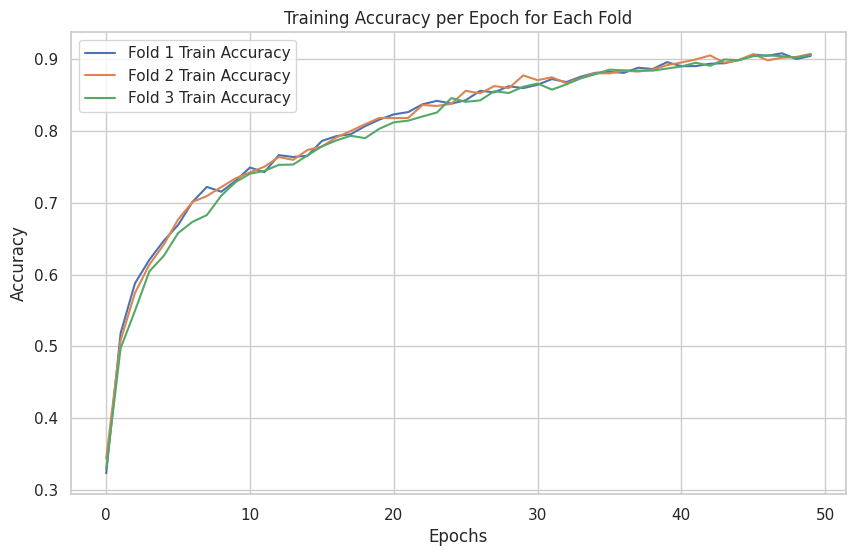

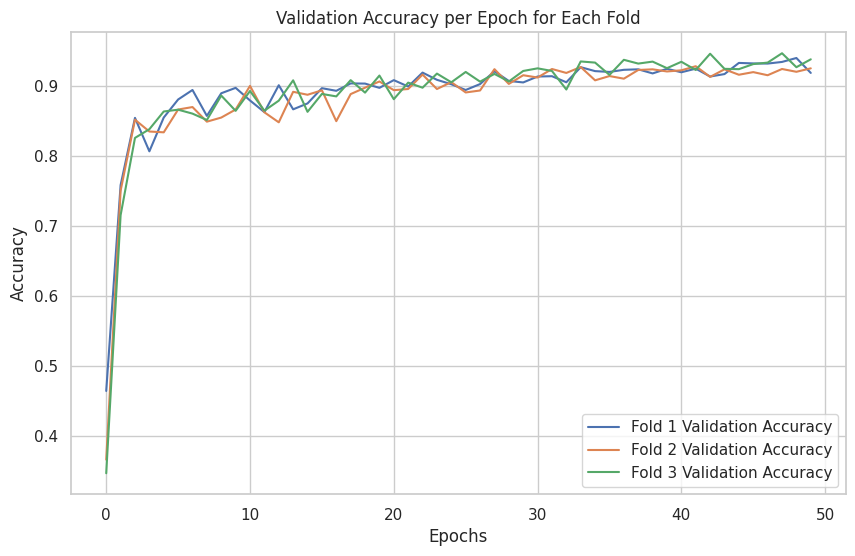

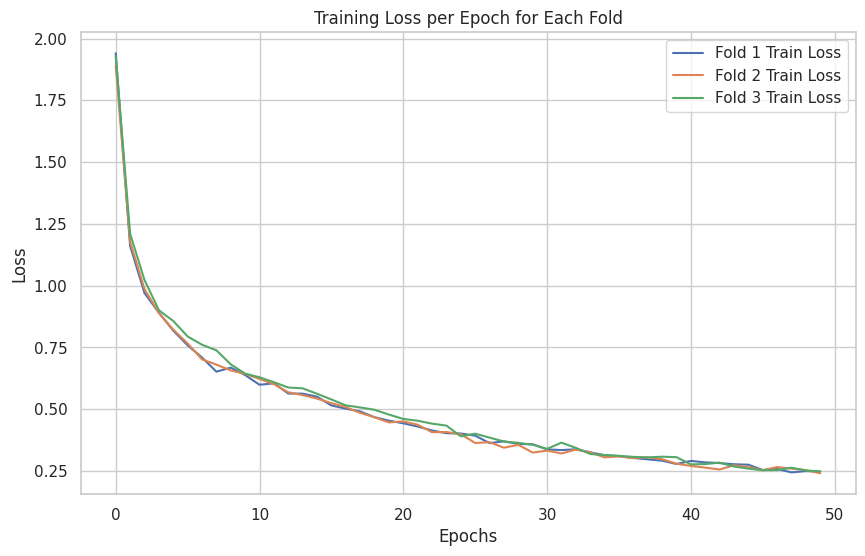

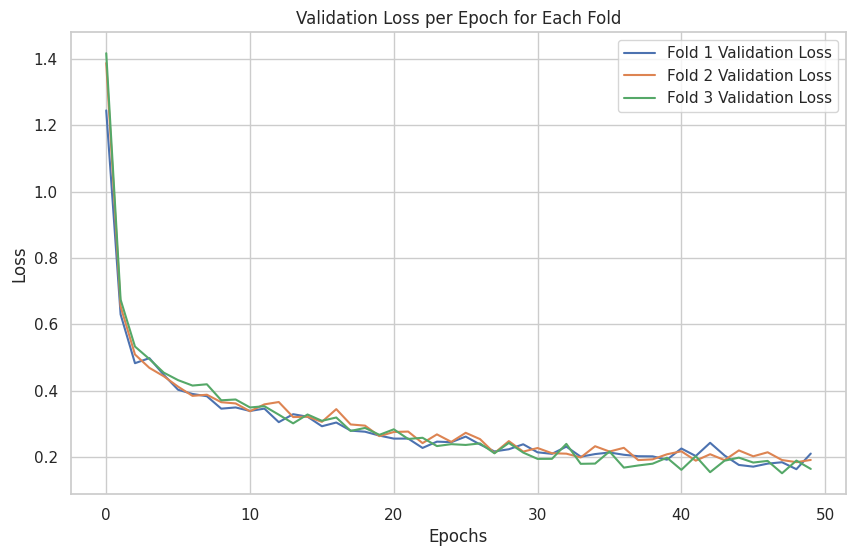

In [ ]:
# Plot training accuracy for each fold
plt.figure(figsize=(10, 6))
for i in range(len(train_accuracies)):
    plt.plot(train_accuracies[i], label=f'Fold {i+1} Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation accuracy for each fold
plt.figure(figsize=(10, 6))
for i in range(len(val_accuracies)):
    plt.plot(val_accuracies[i], label=f'Fold {i+1} Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy per Epoch for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss for each fold
plt.figure(figsize=(10, 6))
for i in range(len(train_losses)):
    plt.plot(train_losses[i], label=f'Fold {i+1} Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation loss for each fold
plt.figure(figsize=(10, 6))
for i in range(len(val_losses)):
    plt.plot(val_losses[i], label=f'Fold {i+1} Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss per Epoch for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

## Confusion matrix & classification report for training

Train Accuracy: 0.9554, Train Loss: 0.1306
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.78      1.00      0.88       139
           2       0.95      0.83      0.88       347
           3       0.94      0.96      0.95       612
           4       0.98      0.93      0.95       857
           5       0.93      0.96      0.95      1166
           6       0.96      0.96      0.96      1462
           7       0.96      0.97      0.97      1472
           8       0.97      0.95      0.96       972
           9       0.97      0.95      0.96       654
          10       0.97      1.00      0.99       854

    accuracy                           0.96      8537
   macro avg       0.86      0.86      0.86      8537
weighted avg       0.96      0.96      0.96      8537



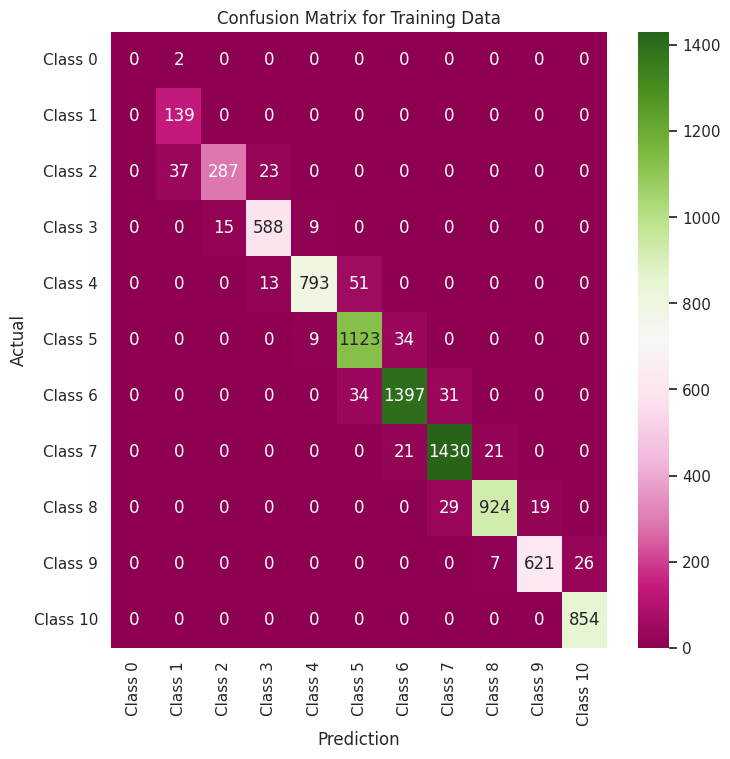

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

X_train_scaled = scaler.transform(X_train)
y_train = y_train

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")

# Make predictions on the training set
y_pred_train = model.predict(X_train_scaled)

# Convert predictions to class labels (one-hot to integer)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_true_train = np.argmax(y_train, axis=1)

# Classification Report for Train Data
class_report_train = classification_report(y_true_train, y_pred_classes_train)
print("Training Classification Report:")
print(class_report_train)

# Confusion Matrix for Train Data
conf_matrix_train = confusion_matrix(y_true_train, y_pred_classes_train)


plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PiYG',
            xticklabels=[f'Class {i}' for i in range(conf_matrix_train.shape[1])],
            yticklabels=[f'Class {i}' for i in range(conf_matrix_train.shape[0])], cbar=True)

plt.title('Confusion Matrix for Training Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Show the plot
plt.show()


## Confusion matrix & classfication report for test

Test Accuracy: 0.9485, Test Loss: 0.1446
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.73      1.00      0.84        46
           2       0.94      0.75      0.83       111
           3       0.91      0.96      0.93       178
           4       0.98      0.90      0.94       266
           5       0.92      0.97      0.94       350
           6       0.97      0.96      0.96       472
           7       0.95      0.97      0.96       432
           8       0.94      0.94      0.94       267
           9       0.97      0.95      0.96       192
          10       0.99      1.00      0.99       246

    accuracy                           0.95      2561
   macro avg       0.85      0.85      0.85      2561
weighted avg       0.95      0.95      0.95      2561



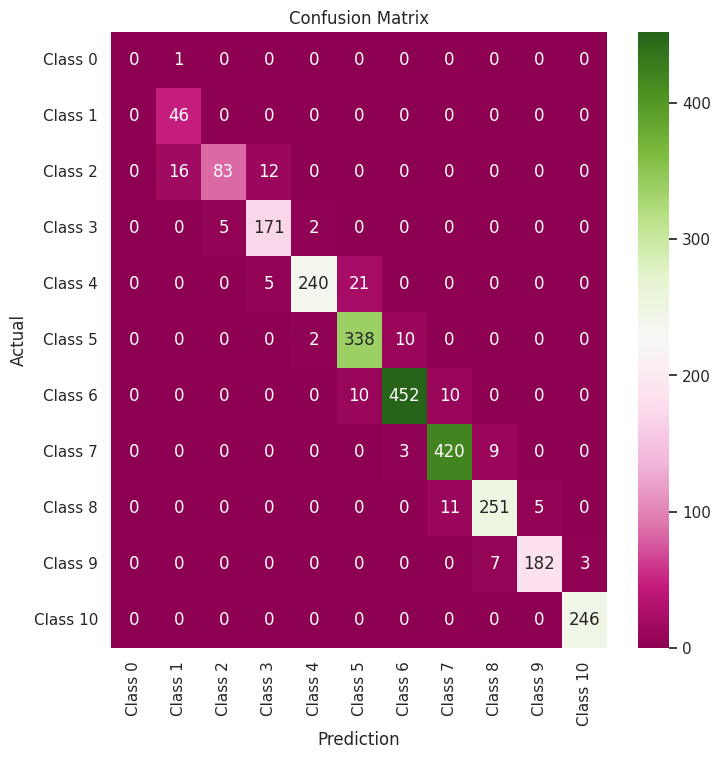

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


X_test_scaled = scaler.transform(X_test)
y_test = y_test

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PiYG',
            xticklabels=[f'Class {i}' for i in range(conf_matrix.shape[1])],
            yticklabels=[f'Class {i}' for i in range(conf_matrix.shape[0])], cbar=True)


plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Show the plot
plt.show()


## ROC AUC curve on test

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


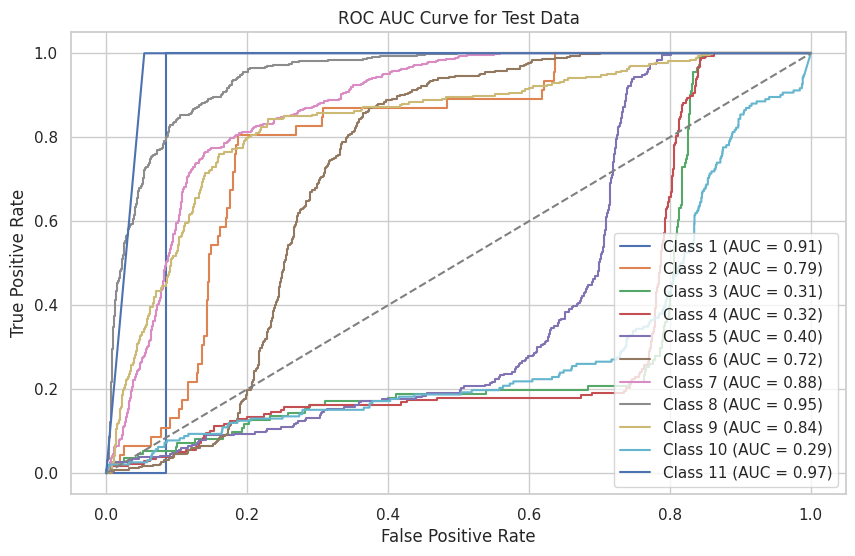

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming 'X_test' and 'y_test' are your test data and labels
# Get predicted probabilities for each class on the test set
predicted_probs = model.predict(X_test)  # Use predict for Keras models
n_classes = predicted_probs.shape[1]

# Binarize the true labels if they are not already in one-hot encoded format
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], predicted_probs[:, j])
    roc_auc[j] = auc(fpr[j], tpr[j])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for j in range(n_classes):
    plt.plot(fpr[j], tpr[j], label=f'Class {j+1} (AUC = {roc_auc[j]:.2f})')

# Plot diagonal (chance level)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Test Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **ANN model ( Input layer 256 , learnig_rate = 1e^-3)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def ANN_model(input_dim, num_classes):
    model = Sequential()

    # Input layer
    model.add(Dense(256, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())

    # Hidden layers with different number of neurons and layers
    model.add(Dense(128, activation='relu'))  # Decreased neurons
    model.add(Dropout(0.3))  # Adjusted dropout rate
    model.add(BatchNormalization())

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    # Output layer (for multi-class classification)
    model.add(Dense(num_classes, activation='softmax'))  # Number of classes

    # Compile the model with a slightly higher learning rate
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()
    return model


In [ ]:
import matplotlib.pyplot as plt

train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for fold, (train_index, val_index) in enumerate(kf.split(X, np.argmax(y, axis=1))):
    print(f"Training on fold {fold + 1}...")

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Normalize the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    model = ANN_model(X_train_scaled.shape[1], y_train.shape[1])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=45,
                        batch_size=16, validation_data=(X_val_scaled, y_val),
                        verbose=1)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)
    print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")

    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

Training on fold 1...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,587 (189.79 KB)

 Trainable params: 47,627 (186.04 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2028 - loss: 2.3508 - val_accuracy: 0.6257 - val_loss: 1.0429
Epoch 2/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4248 - loss: 1.3612 - val_accuracy: 0.7709 - val_loss: 0.7450
Epoch 3/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5032 - loss: 1.1489 - val_accuracy: 0.7899 - val_loss: 0.6664
Epoch 4/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5469 - loss: 1.0618 - val_accuracy: 0.7836 - val_loss: 0.6410
Epoch 5/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5796 - loss: 0.9905 - val_accuracy: 0.8093 - val_loss: 0.5787
Epoch 6/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6084 - loss: 0.9256 - val_accuracy: 0.8402 - val_loss: 0.5192
Epoch 7/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6286 - loss: 0.8884 - val_accuracy: 0.8400 - val_loss: 0.5261
Epoch 8/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6395 - loss: 0.8583 - val_accuracy: 0.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,587 (189.79 KB)

 Trainable params: 47,627 (186.04 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2321 - loss: 2.2721 - val_accuracy: 0.6352 - val_loss: 1.0460
Epoch 2/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4280 - loss: 1.3535 - val_accuracy: 0.7209 - val_loss: 0.8037
Epoch 3/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5073 - loss: 1.1526 - val_accuracy: 0.7617 - val_loss: 0.7120
Epoch 4/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5271 - loss: 1.1015 - val_accuracy: 0.7999 - val_loss: 0.6313
Epoch 5/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5615 - loss: 1.0156 - val_accuracy: 0.7659 - val_loss: 0.6156
Epoch 6/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5812 - loss: 0.9685 - val_accuracy: 0.8283 - val_loss: 0.5663
Epoch 7/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5999 - loss: 0.9427 - val_accuracy: 0.8194 - val_loss: 0.5322
Epoch 8/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6118 - loss: 0.8867 - val_accuracy: 0.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,587 (189.79 KB)

 Trainable params: 47,627 (186.04 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2278 - loss: 2.2700 - val_accuracy: 0.5961 - val_loss: 1.0541
Epoch 2/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4360 - loss: 1.3604 - val_accuracy: 0.6989 - val_loss: 0.8155
Epoch 3/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4978 - loss: 1.1699 - val_accuracy: 0.7912 - val_loss: 0.6975
Epoch 4/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5223 - loss: 1.0778 - val_accuracy: 0.7837 - val_loss: 0.6533
Epoch 5/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5787 - loss: 0.9868 - val_accuracy: 0.8194 - val_loss: 0.5889
Epoch 6/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5925 - loss: 0.9593 - val_accuracy: 0.8243 - val_loss: 0.5616
Epoch 7/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6236 - loss: 0.9059 - val_accuracy: 0.8351 - val_loss: 0.5526
Epoch 8/45
534/534 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6218 - loss: 0.8938 - val_accuracy: 0.

In [ ]:
# After the cross-validation loop, print the average results
print(f"Average Train Accuracy: {np.max(train_accuracies):.4f}")
print(f"Average Validation Accuracy: {np.max(val_accuracies):.4f}")
print(f"Average Train Loss: {np.min(train_losses):.4f}")
print(f"Average Validation Loss: {np.min(val_losses):.4f}")


Average Train Accuracy: 0.8574
Average Validation Accuracy: 0.9274
Average Train Loss: 0.3995
Average Validation Loss: 0.2179


## Training & Validation evaluation results for each fold

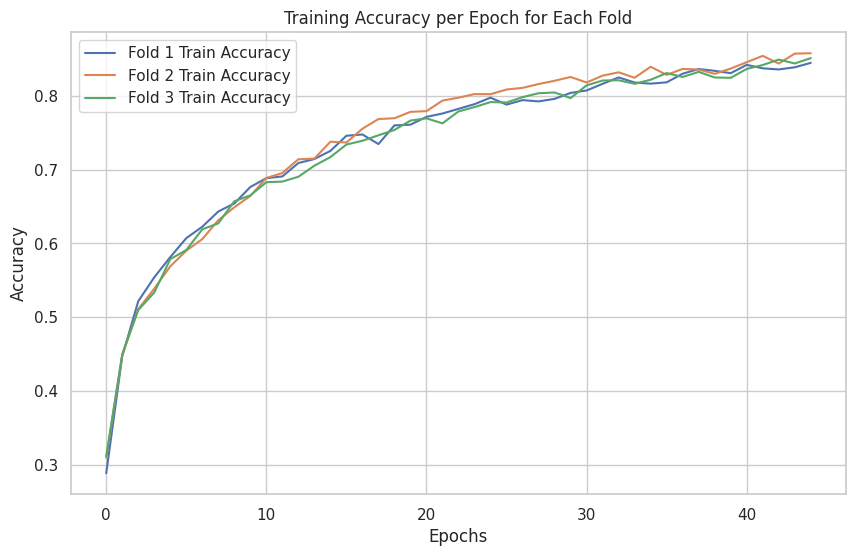

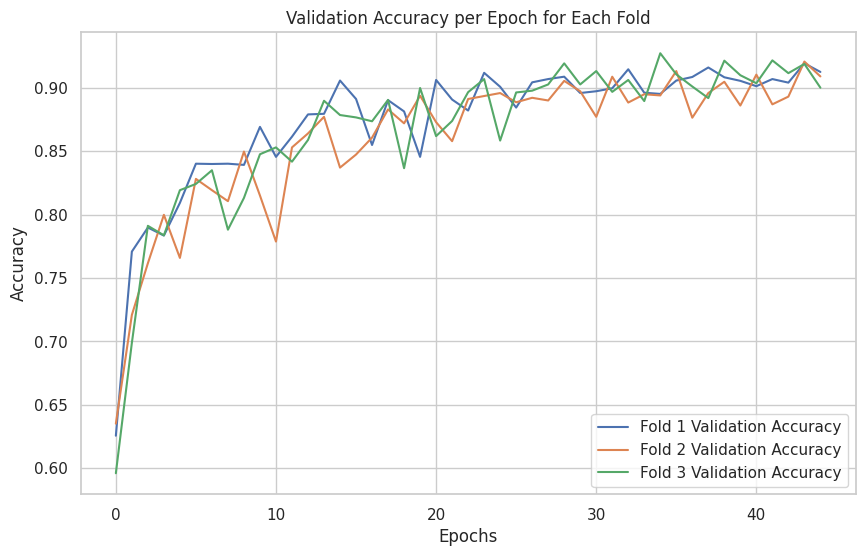

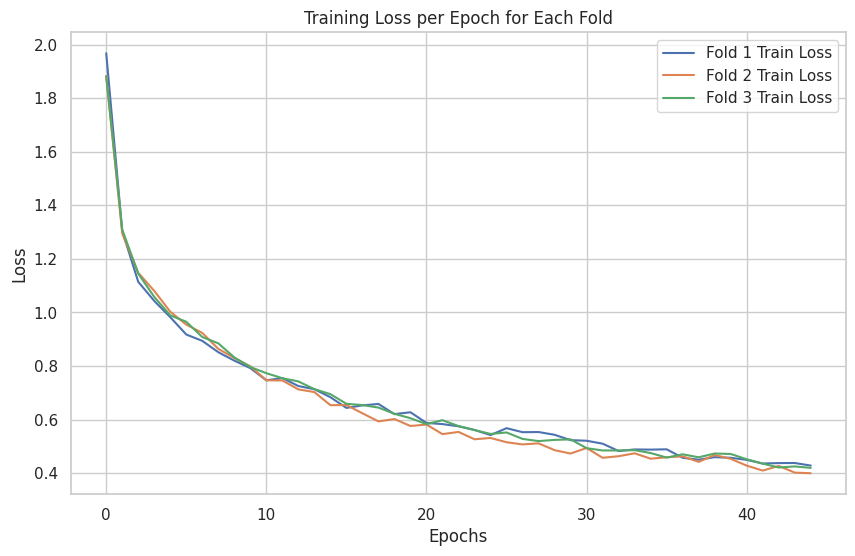

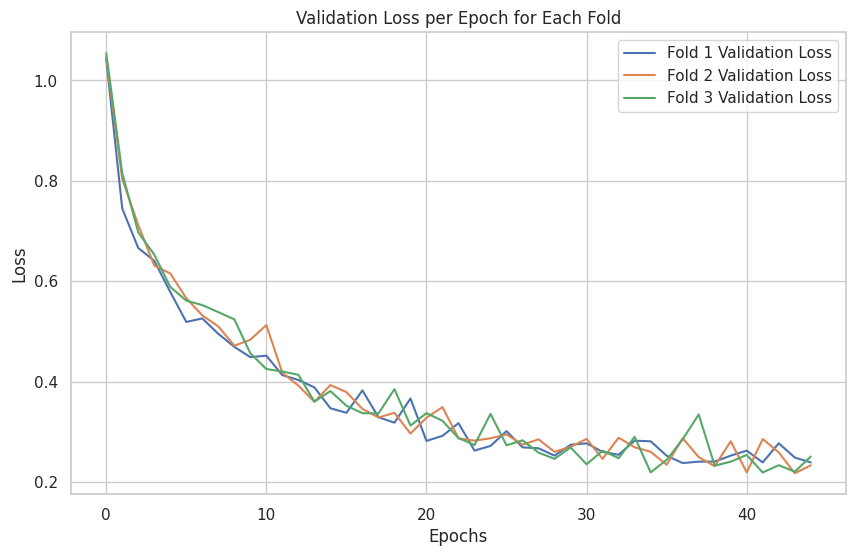

In [ ]:
# Plot training accuracy for each fold
plt.figure(figsize=(10, 6))
for i in range(len(train_accuracies)):
    plt.plot(train_accuracies[i], label=f'Fold {i+1} Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation accuracy for each fold
plt.figure(figsize=(10, 6))
for i in range(len(val_accuracies)):
    plt.plot(val_accuracies[i], label=f'Fold {i+1} Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy per Epoch for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss for each fold
plt.figure(figsize=(10, 6))
for i in range(len(train_losses)):
    plt.plot(train_losses[i], label=f'Fold {i+1} Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation loss for each fold
plt.figure(figsize=(10, 6))
for i in range(len(val_losses)):
    plt.plot(val_losses[i], label=f'Fold {i+1} Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss per Epoch for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

## Confusion matrix & classification report for training

Train Accuracy: 0.9034, Train Loss: 0.2479
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.77      0.95      0.85       139
           2       0.95      0.54      0.69       347
           3       0.78      0.79      0.78       612
           4       0.81      0.98      0.89       857
           5       0.91      0.93      0.92      1166
           6       0.97      0.86      0.91      1462
           7       0.91      0.97      0.94      1472
           8       0.92      0.94      0.93       972
           9       0.97      0.81      0.89       654
          10       0.93      1.00      0.96       854

    accuracy                           0.90      8537
   macro avg       0.81      0.80      0.80      8537
weighted avg       0.91      0.90      0.90      8537



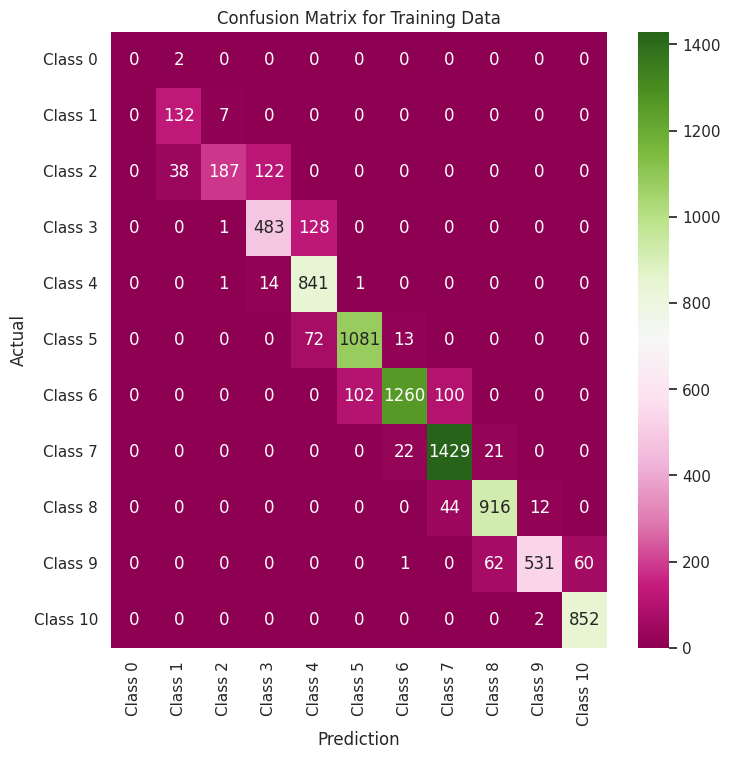

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

X_train_scaled = scaler.transform(X_train)
y_train = y_train


train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")

y_pred_train = model.predict(X_train_scaled)

y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_true_train = np.argmax(y_train, axis=1)

# Classification Report for Train Data
class_report_train = classification_report(y_true_train, y_pred_classes_train)
print("Training Classification Report:")
print(class_report_train)

# Confusion Matrix for Train Data
conf_matrix_train = confusion_matrix(y_true_train, y_pred_classes_train)


plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PiYG',
            xticklabels=[f'Class {i}' for i in range(conf_matrix_train.shape[1])],
            yticklabels=[f'Class {i}' for i in range(conf_matrix_train.shape[0])], cbar=True)

plt.title('Confusion Matrix for Training Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Show the plot
plt.show()


## Confusion matrix & classification report for test

Test Accuracy: 0.8938, Test Loss: 0.2686
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.78      0.93      0.85        46
           2       0.94      0.41      0.57       111
           3       0.71      0.82      0.76       178
           4       0.83      0.98      0.90       266
           5       0.91      0.92      0.92       350
           6       0.97      0.86      0.91       472
           7       0.89      0.97      0.93       432
           8       0.89      0.94      0.92       267
           9       0.98      0.79      0.88       192
          10       0.94      0.99      0.96       246

    accuracy                           0.89      2561
   macro avg       0.80      0.78      0.78      2561
weighted avg       0.90      0.89      0.89      2561



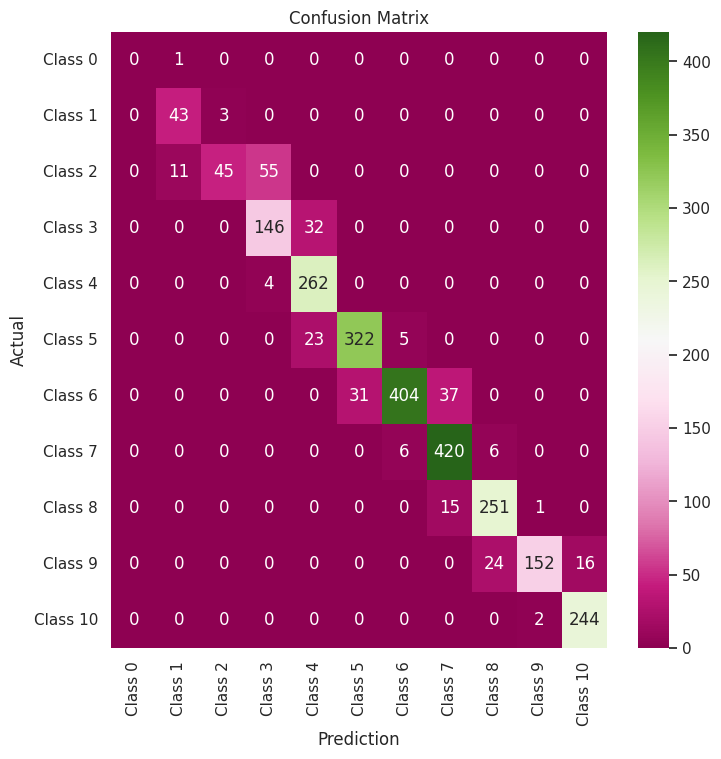

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


X_test_scaled = scaler.transform(X_test)
y_test = y_test

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

y_pred = model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PiYG',
            xticklabels=[f'Class {i}' for i in range(conf_matrix.shape[1])],
            yticklabels=[f'Class {i}' for i in range(conf_matrix.shape[0])], cbar=True)


plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Show the plot
plt.show()


## ROC AUC curve on test

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


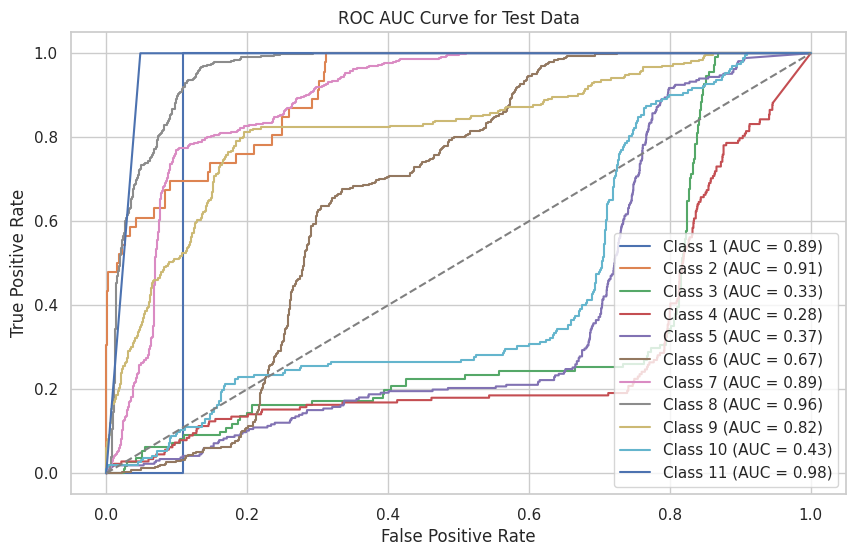

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


predicted_probs = model.predict(X_test)
n_classes = predicted_probs.shape[1]

y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for j in range(n_classes):
    fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], predicted_probs[:, j])
    roc_auc[j] = auc(fpr[j], tpr[j])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for j in range(n_classes):
    plt.plot(fpr[j], tpr[j], label=f'Class {j+1} (AUC = {roc_auc[j]:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Test Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Ensemble Model(ANN+Random Forest)**

## ANN Model for Ensemble

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Function to create the ANN model
def create_ann_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


for train_index, val_index in kf.split(X_train_scaled, np.argmax(y_train, axis=1)):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train the ANN model
    ann_model = create_ann_model(X_train.shape[1], y_train.shape[1])
    history = ann_model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Store training and validation accuracy/loss for each fold (last epoch)
    train_accuracies.append(history.history['accuracy'][-1])
    train_losses.append(history.history['loss'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])
    val_losses.append(history.history['val_loss'][-1])

    print(f"Fold Train Accuracy: {history.history['accuracy'][-1]:.4f}, Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Fold Train Loss: {history.history['loss'][-1]:.4f}, Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Evaluate final model on test set
final_ann_model = create_ann_model(X_train.shape[1], y_train.shape[1])
final_ann_model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, verbose=1)

final_ann_predictions = np.argmax(final_ann_model.predict(X_test_scaled), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

ann_accuracy = accuracy_score(y_test_labels, final_ann_predictions)
ann_loss = final_ann_model.evaluate(X_test_scaled, y_test, verbose=0)[0]
print(f"Final ANN Test Accuracy: {ann_accuracy:.4f}, Test Loss: {ann_loss:.4f}")

Fold Train Accuracy: 0.8192, Validation Accuracy: 0.9153
Fold Train Loss: 0.4150, Validation Loss: 0.2813
Fold Train Accuracy: 0.8368, Validation Accuracy: 0.9006
Fold Train Loss: 0.3937, Validation Loss: 0.2827
Fold Train Accuracy: 0.8240, Validation Accuracy: 0.9044
Fold Train Loss: 0.4093, Validation Loss: 0.2883
Epoch 1/40
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3298 - loss: 1.8154
Epoch 2/40
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6163 - loss: 0.9089
Epoch 3/40
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7145 - loss: 0.6776
Epoch 4/40
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7589 - loss: 0.5763
Epoch 5/40
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7960 - loss: 0.4845
Epoch 6/40
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8081 - loss: 0.4614
Epoch 7/40
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.4312
Epoch 8/40
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8330 - loss: 0

## Random Forest classifier

In [ ]:
# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1   )
rf_model.fit(X_train_scaled, np.argmax(y_train, axis=1))

# Train accuracy and loss for Random Forest
rf_train_accuracy = rf_model.score(X_train_scaled, np.argmax(y_train, axis=1))
rf_train_loss = 1 - rf_train_accuracy

# Evaluate Random Forest model on test set
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test_labels, rf_predictions)
rf_loss = 1 - rf_accuracy

print(f"Random Forest Train Accuracy: {rf_train_accuracy:.4f}, Train Loss: {rf_train_loss:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}, Test Loss: {rf_loss:.4f}")


Random Forest Train Accuracy: 0.9673, Train Loss: 0.0327
Random Forest Test Accuracy: 0.9324, Test Loss: 0.0676


## Defining Meta Model (XGBoost)

In [ ]:
# Stack the ANN and Random Forest predictions and train a meta-model (XGBoost)
ann_preds = final_ann_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Stack the predictions into a new feature set
stacked_preds = np.column_stack((np.argmax(ann_preds, axis=1), rf_preds))

# Train meta-model (XGBoost)
meta_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, eval_metric='mlogloss', random_state=42)
meta_model.fit(stacked_preds, y_test_labels)

# Train accuracy and loss for Ensemble (XGBoost) model
meta_train_accuracy = meta_model.score(stacked_preds, y_test_labels)
meta_train_loss = 1 - meta_train_accuracy

# Final predictions with meta-model
meta_predictions = meta_model.predict(stacked_preds)
meta_accuracy = accuracy_score(y_test_labels, meta_predictions)
meta_loss = 1 - meta_accuracy  # Meta-model loss

print(f"Ensemble Model Train Accuracy (XGBoost Meta-Model): {meta_train_accuracy:.4f}, Train Loss: {meta_train_loss:.4f}")
print(f"Ensemble Model Test Accuracy (XGBoost Meta-Model): {meta_accuracy:.4f}, Test Loss: {meta_loss:.4f}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Ensemble Model Train Accuracy (XGBoost Meta-Model): 0.9664, Train Loss: 0.0336
Ensemble Model Test Accuracy (XGBoost Meta-Model): 0.9664, Test Loss: 0.0336


## Classification reports for ensemble model

In [ ]:
from sklearn.metrics import classification_report

# Get predictions from the final ANN model
final_model_predictions = final_ann_model.predict(X_test_scaled)
final_model_predictions = np.argmax(final_model_predictions, axis=1) # Convert probabilities to class labels


# classification report for the final ANN model
print("Classification Report for ANN:")
print(classification_report(y_test_labels, final_model_predictions))

# classification report for Random Forest model
print("Classification Report for Random Forest:")
print(classification_report(y_test_labels, rf_predictions))

# For Ensemble Model (XGBoost meta-model),classification report
meta_predictions = meta_model.predict(stacked_preds)
print("Classification Report for Ensemble Model (XGBoost Meta-Model):")
print(classification_report(y_test_labels, meta_predictions))

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report for ANN:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      0.96      0.93        46
           2       0.95      0.90      0.93       111
           3       0.95      0.83      0.88       178
           4       0.89      0.92      0.91       266
           5       0.94      0.95      0.94       350
           6       0.97      0.97      0.97       472
           7       0.96      0.96      0.96       432
           8       0.92      0.98      0.95       267
           9       0.94      0.89      0.91       192
          10       0.94      0.96      0.95       246

    accuracy                           0.94      2561
   macro avg       0.85      0.85      0.85      2561
weighted avg       0.94      0.94      0.94      2561

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.

## Confusion matrix for ensemble model

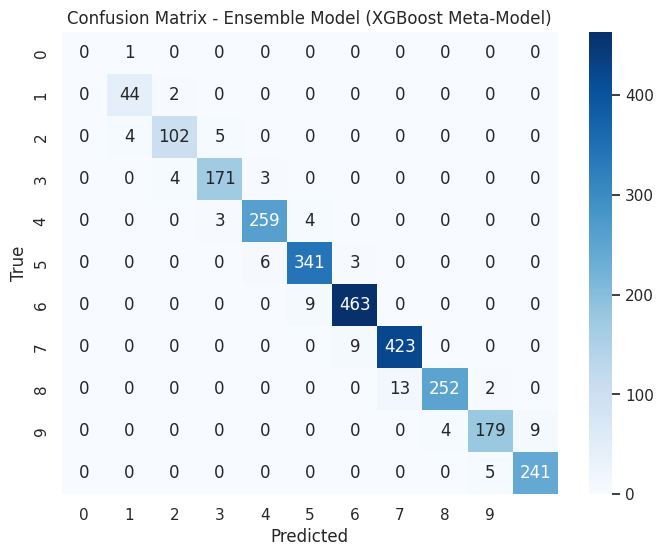

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

meta_predictions = meta_model.predict(stacked_preds)  # Ensemble meta-model predictions

# confusion matrix for the ensemble model
cm_meta = confusion_matrix(y_test_labels, meta_predictions)

# confusion matrix for Ensemble Model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix - Ensemble Model (XGBoost Meta-Model)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Explainable AI on XGBoost (Meta model)**

In [ ]:
!pip install shap

In [ ]:
from xgboost import XGBClassifier


# Train
xgb = XGBClassifier(n_estimators=300,max_depth=2, random_state=150, learning_rate=0.02)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=150, ...)

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)


100%|===================| 28124/28171 [08:05<00:00]       

100%|===================| 28138/28171 [07:47<00:00]       

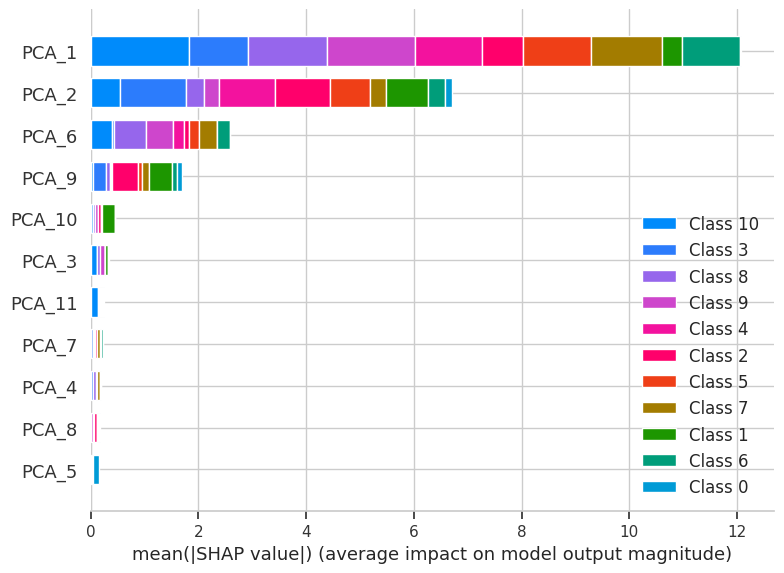

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0be274d851d4990cc7178c9a2ef7aced5085148e60eeaf75810153911b961d72
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.values,
    mode='classification',
    feature_names=X_train.columns)
exp = explainer.explain_instance(X_test.iloc[28], xgb.predict_proba)
exp.show_in_notebook(show_table = True)

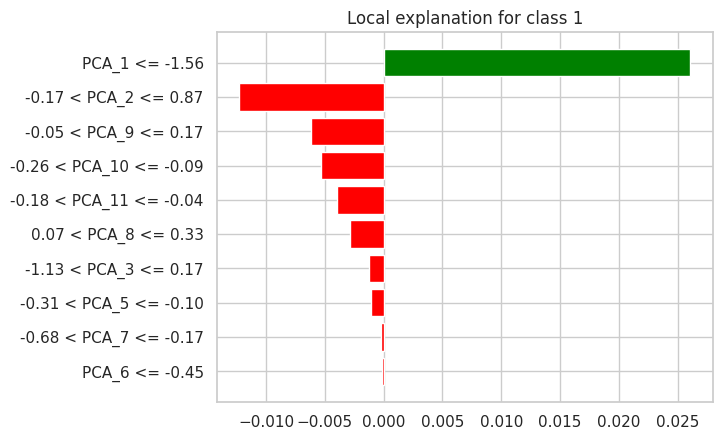

In [ ]:
import matplotlib.pyplot as plt

# Generate the LIME plot
fig = exp.as_pyplot_figure()

# Get the axes object from the figure
ax = fig.axes[0]

# Set the background color to white
ax.set_facecolor('white')

# Display the plot
plt.show()

# **Thank You!**